Christian Erikson

Math 76 Homework 5

# SVM and Kernels

### Objective
Through this project, you will learn to use nonlinear kernels to improve a support vector classifier. The toy examples within this project aim to guide you as you build your intuition for the decision boundaries that can be generated via different kernels.

This project is structured as follows:
#### Part 1: Binary classification of synthetic data
1.1. Generate and explore synthetic data

1.2. SVM with nonlinear kernels
#### Part 2: US Flags
2.1. Load and explore flags data

2.2. SVMs for flag pixel data

2.3. Comparison to decision trees


In [1]:
# standard imports
import os, random
import numpy as np
import matplotlib.pyplot as plt

# sklearn imports
from sklearn.datasets import *
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.inspection import DecisionBoundaryDisplay

from PIL import Image

## Part 1: Binary classification of synthetic data

### Part 1.1: Generate and explore synthetic data
The next cell defines the function `generate_dataset`, which you can use to generate synthetic (i.e., computer generated) data sets for binary classification. It includes eight different methods for data-set generation. 
1. Try out each method and visualize the resulting data set. For the 'swiss' and 'scurve' data sets, try out two different values of the keyword argument `splits`.
2. Comment on WHETHER and WHY you anticipate this data set to be relatively easy or relatively hard to classify with a linear classifier.
3. Comment on WHETHER and WHY you anticipate this data set to be relatively easy or relatively hard to classify with a nonlinear classifier.

In [4]:
# Function to convert an array of real numbers into an array of 0s and 1s
def binarize(arr, split=10):
    # Calculate the decile thresholds
    percentiles = int(np.ceil(100/split))
    split_points = np.arange(0, 100+percentiles, percentiles)
    split_points[split_points>100] = 100
    deciles = np.percentile(arr, split_points)
    
    # Create a new array to hold the modified values
    modified_arr = np.zeros_like(arr)
    
    # Iterate through each decile range and set values accordingly
    for i in range(split):
        print(i)
        if i == split-1:
            if i % 2 == 0:
                # Set values in even deciles to 0
                modified_arr[(arr >= deciles[i])] = 0
            else:
                # Set values in odd deciles to 1
                modified_arr[(arr >= deciles[i])] = 1
        else:        
            if i % 2 == 0:
                # Set values in even deciles to 0
                modified_arr[(arr >= deciles[i]) & (arr < deciles[i + 1])] = 0
            else:
                # Set values in odd deciles to 1
                modified_arr[(arr >= deciles[i]) & (arr < deciles[i + 1])] = 1
    
    return modified_arr

# Function to generate datasets
def generate_dataset(dataset_type, n_samples=300, noise=0.1, split=10, random_state=0):
    if dataset_type == 'linearly_separable':
        X, y = make_classification(n_samples=n_samples, n_features=2, n_redundant=0, n_informative=2,
                                   random_state=random_state, n_clusters_per_class=1)
    elif dataset_type == 'blobs':
        X, y = make_blobs(n_samples=[n_samples//2, n_samples//2], random_state=random_state, cluster_std=noise)
    elif dataset_type == 'quantiles':
        X, y = make_gaussian_quantiles(n_samples=n_samples, n_classes=2, cov=noise, random_state=random_state)
    elif dataset_type == 'moons':
        X, y = make_moons(n_samples=n_samples, noise=noise, random_state=random_state)
    elif dataset_type == 'circles':
        X, y = make_circles(n_samples=n_samples, noise=noise, factor=0.5, random_state=random_state)
    elif dataset_type == 'unstructured':
        X, y = np.random.random(size=(n_samples, 2)), np.random.randint(0,2, size=(n_samples))
    elif dataset_type == 'swiss':
        X, y = make_swiss_roll(n_samples=n_samples, noise=noise, random_state=random_state)
        X=np.array([X[:,0],X[:,2]]).T
        y = binarize(y, split=split)
    elif dataset_type == 'scurve':
        X, y = make_s_curve(n_samples=n_samples, noise=noise, random_state=random_state)
        X=np.array([X[:,0],X[:,2]]).T
        y = binarize(y, split=split)
    else:
        raise ValueError("Invalid dataset type")
    
    X = StandardScaler().fit_transform(X)
    return X, y

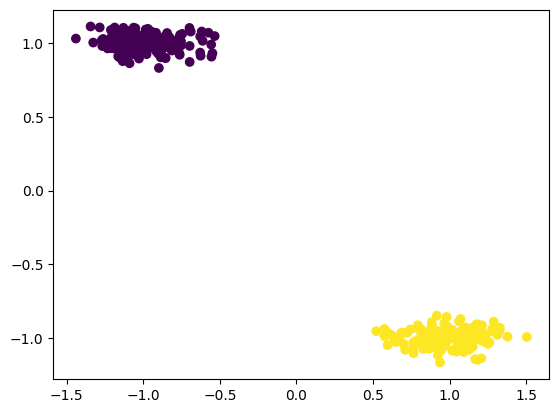

In [18]:
# Generate and visualize data blobs
X, y = generate_dataset('blobs')
plt.scatter(X[:,0], X[:,1], c=y)

I anticipate that this data set will be easy to cluster with a linear classifier because there is clear seperation in two dimensions without any overlap, such that a line could separate the classes perfectly.

A non-linear classifier should also do well since there is such large distinction in the classes.

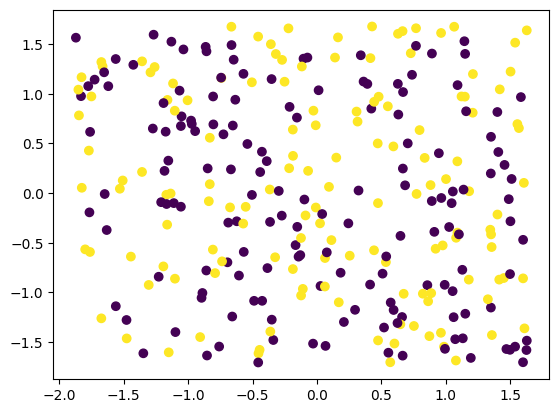

In [19]:
# Generate and visualize unstructured data
X, y = generate_dataset('unstructured')
plt.scatter(X[:,0], X[:,1], c=y)

I anticipate that this data set will e difficult to classify with either a linear or non-linear classifier because there is almost no seperation in the data and there is not another dimension where there may be better separation.

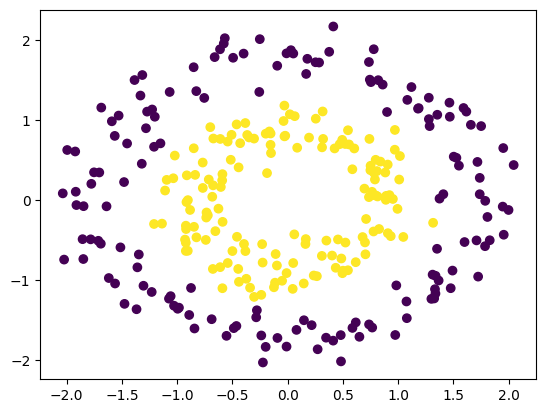

In [20]:
# Generate and visualize circles data set
X, y = generate_dataset('circles')
plt.scatter(X[:,0], X[:,1], c=y)

I anticipate that this data set will be difficult to separate using a linear classifer but easy to separate with a nonlinear classifier becuase there is a radial boundary that the non-linear classifier could find.

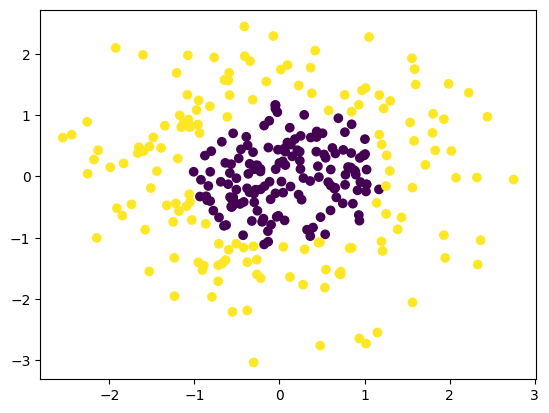

In [21]:
# Generate and visualize Gaussian quantiles
X, y = generate_dataset('quantiles')
plt.scatter(X[:,0], X[:,1], c=y)

I anticipate that this data set will be difficult to separate using a linear classifer but easy to separate with a nonlinear classifier becuase there is a radial boundary that the non-linear classifier could find.

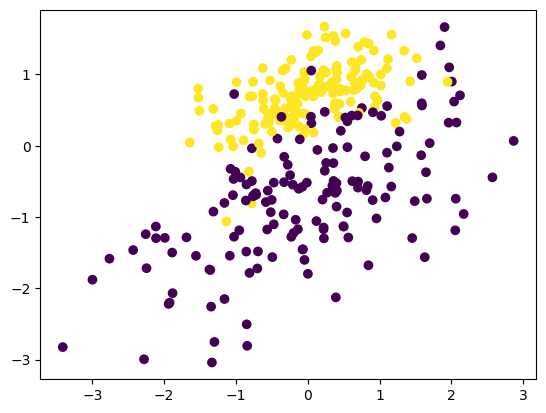

In [23]:
# Generate and visualize linearly separable data
X, y = generate_dataset('linearly_separable')
plt.scatter(X[:,0], X[:,1], c=y)

I anticipate that this data set will be easy for the linear classifer because a line can be drawn to decently separate the data. The nonlinear classifier will probably fit well, but may be prone to overfitting.

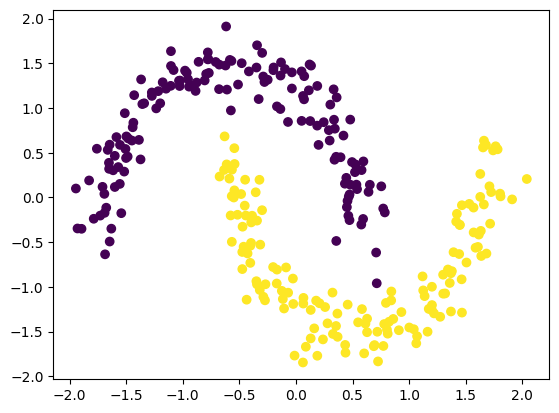

In [24]:
# Generate and visualize moons data set
X, y = generate_dataset('moons')
plt.scatter(X[:,0], X[:,1], c=y)

I anticipate that this data set will be difficult to classify with a linear classifier becuase there will always be a fair number of misclassified points using a line. A nonlinear classifier should be able to do well, however.

0
1


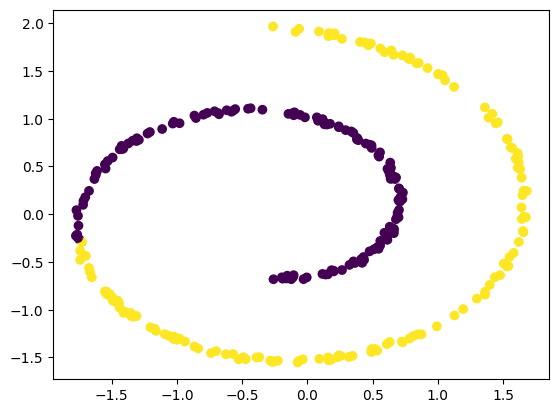

In [5]:
# Generate and visualize swiss role with 2 split sets
X, y = generate_dataset('swiss', split=2)
plt.scatter(X[:,0], X[:,1], c=y)

I anticipate that this data set will be difficult to classify with a linear classifier because there wil always be yellow points on both sides of a line. A non-linear classifier should do well because a curve or sectioned region can cleanly separate the classes. A decision tree should be able to handle this one well.

0
1


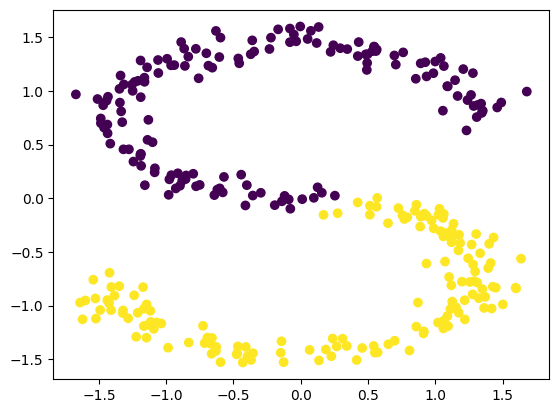

In [6]:
# Generate and visualize S curve with 2 split sets
X, y = generate_dataset('scurve', split=2)
plt.scatter(X[:,0], X[:,1], c=y)

I anticipate that this data set will actually be well classified by a linear classifier because there is clear y-dimension separation despite the curvature. A nonlinear classifier should also do fine on the training data because a curve could be drawn to separate the classes as well.

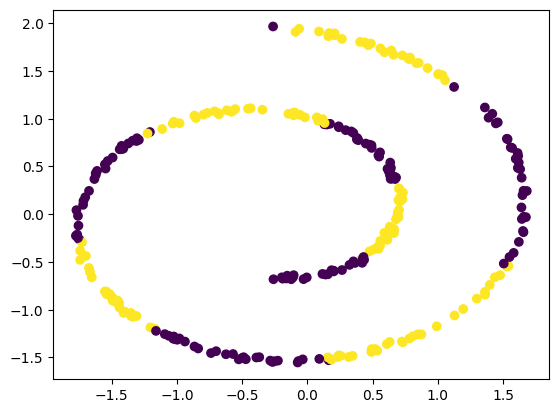

In [27]:
# Generate and visualize swiss role with 10 split sets
X, y = generate_dataset('swiss')
plt.scatter(X[:,0], X[:,1], c=y)

I anticipate that this data set will be difficult to classify for either method without projection into higher dimensions because the data are well mixed. The inner curl is the problem.

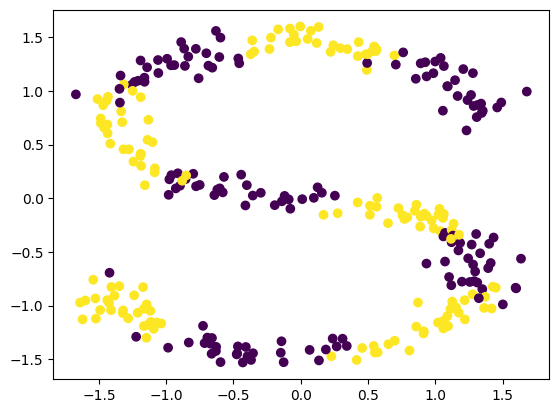

In [32]:
# Generate and visualize S curve with 10 split sets
X, y = generate_dataset('scurve')
plt.scatter(X[:,0], X[:,1], c=y)

I anticipate that this data set is too mixed for a linear classifier, but a complex nonliner boundary may be possible. 

### Part 1.2: SVM with nonlinear kernels

The next cell defines the function `kernel_comparison`, which you can use to visually compare the decision boundaries generated by SVMs with different kernels. 

1. The kernel comparison currently produces only visual results. Add code to the function so that it also outputs train and test accuracy of the different SVMs. (Note: Think carefully about where the right place in the code is to do a train-test split.)
2. Run the kernel comparison for the data sets from Part 1.1. Do the results confirm or contradict your expectations that you formulated in Part 1.1.? Did any of the results surprise you?
3. Consult sklearn's documentation to learn how the keyword arguments `degree` and `gamma` affect your classifier. Try out a few different values of these parameters. How and what can one infer from the shape of the decision boundary about the classifier's `degree` or `gamma`?

In [2]:
from sklearn import svm

def kernel_comparison(X, y, support_vectors=True, tight_box=False, if_flag=False, degree=3, gamma=3):

    fig = plt.figure(figsize=(10,3))
    accuracy_scores = {}

    for ikernel, kernel in enumerate(['linear', 'poly', 'rbf', 'sigmoid']):
        # Split the data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=7)

        # Train the SVC
        clf = svm.SVC(kernel=kernel, degree=degree, gamma=gamma).fit(X_train, y_train)

        y_pred = clf.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_scores[kernel] = accuracy
    
        # Settings for plotting
        ax = plt.subplot(1,4,1+ikernel)
        #x_min, x_max, y_min, y_max = -3, 3, -3, 3
        #ax.set(xlim=(x_min, x_max), ylim=(y_min, y_max))
    
        # Plot decision boundary and margins
        common_params = {"estimator": clf, "X": X, "ax": ax}
        DecisionBoundaryDisplay.from_estimator(
            **common_params,
            response_method="predict",
            plot_method="pcolormesh",
            alpha=0.3,
        )
        DecisionBoundaryDisplay.from_estimator(
            **common_params,
            response_method="decision_function",
            plot_method="contour",
            levels=[-1, 0, 1],
            colors=["k", "k", "k"],
            linestyles=["--", "-", "--"],
        )
    
        if support_vectors:
            # Plot bigger circles around samples that serve as support vectors
            ax.scatter(
                clf.support_vectors_[:, 0],
                clf.support_vectors_[:, 1],
                s=150,
                facecolors="none",
                edgecolors="k",
            )
    
        # Plot samples by color and add legend
        ax.scatter(X[:, 0], X[:, 1], c=y, s=30, edgecolors="k")
        ax.set_title(kernel)
        ax.axis('off')
        if tight_box:
            ax.set_xlim([X[:, 0].min(), X[:, 0].max()])
            ax.set_ylim([X[:, 1].min(), X[:, 1].max()])

        plt.show()
        print("Accuracy Scores:", accuracy_scores)



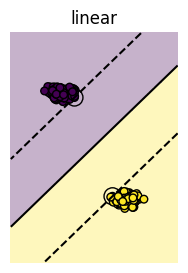

Accuracy Scores: {'linear': 1.0}


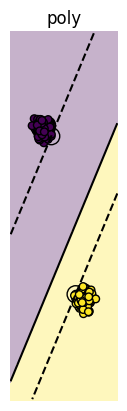

Accuracy Scores: {'linear': 1.0, 'poly': 1.0}


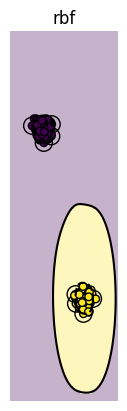

Accuracy Scores: {'linear': 1.0, 'poly': 1.0, 'rbf': 1.0}


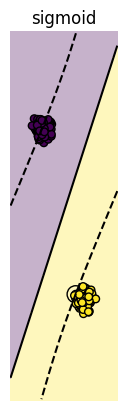

Accuracy Scores: {'linear': 1.0, 'poly': 1.0, 'rbf': 1.0, 'sigmoid': 1.0}


In [17]:
# Show results of kernel comparison for data sets from part 1
X, y = generate_dataset('blobs')
kernel_comparison(X,y)

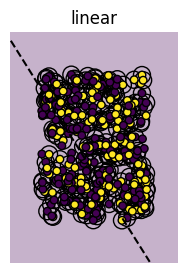

Accuracy Scores: {'linear': 0.4666666666666667}


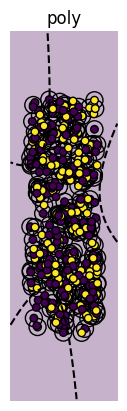

Accuracy Scores: {'linear': 0.4666666666666667, 'poly': 0.4666666666666667}


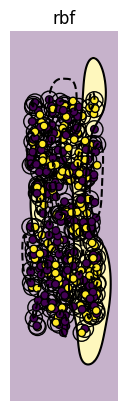

Accuracy Scores: {'linear': 0.4666666666666667, 'poly': 0.4666666666666667, 'rbf': 0.6333333333333333}


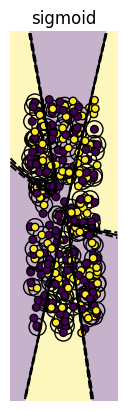

Accuracy Scores: {'linear': 0.4666666666666667, 'poly': 0.4666666666666667, 'rbf': 0.6333333333333333, 'sigmoid': 0.5666666666666667}


In [18]:
X, y = generate_dataset('unstructured')
kernel_comparison(X,y)

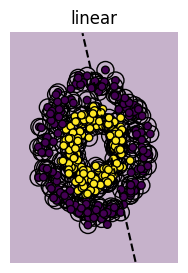

Accuracy Scores: {'linear': 0.4666666666666667}


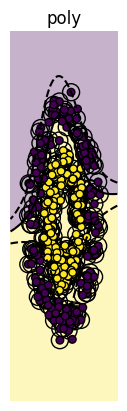

Accuracy Scores: {'linear': 0.4666666666666667, 'poly': 0.7666666666666667}


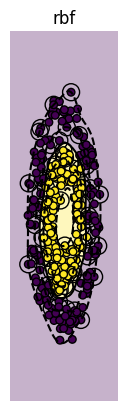

Accuracy Scores: {'linear': 0.4666666666666667, 'poly': 0.7666666666666667, 'rbf': 1.0}


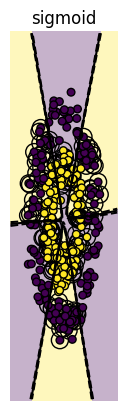

Accuracy Scores: {'linear': 0.4666666666666667, 'poly': 0.7666666666666667, 'rbf': 1.0, 'sigmoid': 0.5666666666666667}


In [19]:
X, y = generate_dataset('circles')
kernel_comparison(X,y)

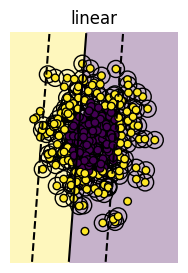

Accuracy Scores: {'linear': 0.6333333333333333}


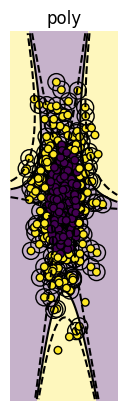

Accuracy Scores: {'linear': 0.6333333333333333, 'poly': 0.5333333333333333}


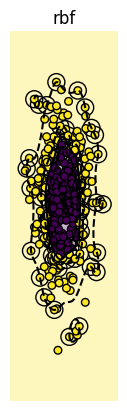

Accuracy Scores: {'linear': 0.6333333333333333, 'poly': 0.5333333333333333, 'rbf': 0.9333333333333333}


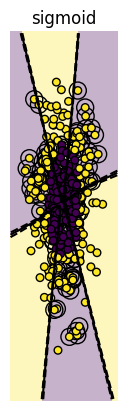

Accuracy Scores: {'linear': 0.6333333333333333, 'poly': 0.5333333333333333, 'rbf': 0.9333333333333333, 'sigmoid': 0.4666666666666667}


In [20]:
X, y = generate_dataset('quantiles')
kernel_comparison(X,y)

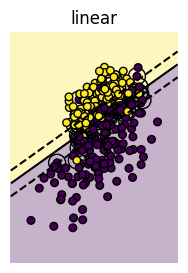

Accuracy Scores: {'linear': 0.9333333333333333}


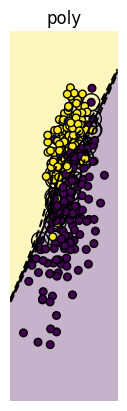

Accuracy Scores: {'linear': 0.9333333333333333, 'poly': 0.9333333333333333}


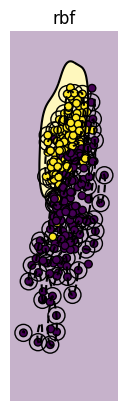

Accuracy Scores: {'linear': 0.9333333333333333, 'poly': 0.9333333333333333, 'rbf': 0.9}


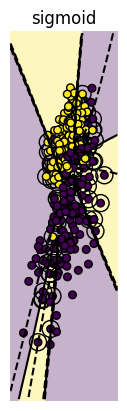

Accuracy Scores: {'linear': 0.9333333333333333, 'poly': 0.9333333333333333, 'rbf': 0.9, 'sigmoid': 0.7333333333333333}


In [21]:
X, y = generate_dataset('linearly_separable')
kernel_comparison(X,y)

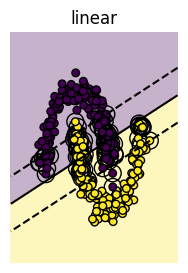

Accuracy Scores: {'linear': 0.9333333333333333}


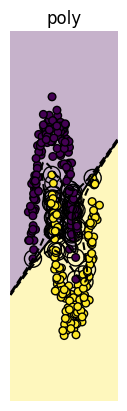

Accuracy Scores: {'linear': 0.9333333333333333, 'poly': 0.9666666666666667}


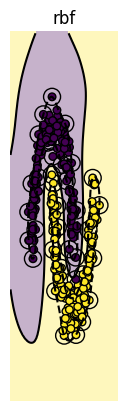

Accuracy Scores: {'linear': 0.9333333333333333, 'poly': 0.9666666666666667, 'rbf': 1.0}


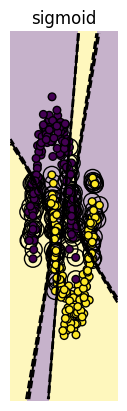

Accuracy Scores: {'linear': 0.9333333333333333, 'poly': 0.9666666666666667, 'rbf': 1.0, 'sigmoid': 0.5666666666666667}


In [22]:
X, y = generate_dataset('moons')
kernel_comparison(X,y)

0
1


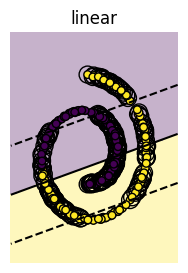

Accuracy Scores: {'linear': 0.6333333333333333}


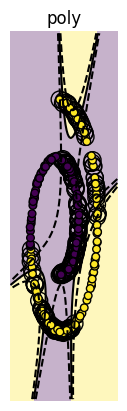

Accuracy Scores: {'linear': 0.6333333333333333, 'poly': 0.7}


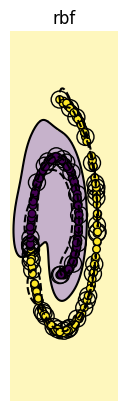

Accuracy Scores: {'linear': 0.6333333333333333, 'poly': 0.7, 'rbf': 1.0}


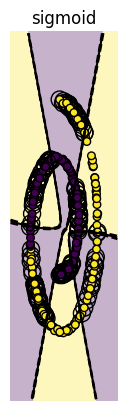

Accuracy Scores: {'linear': 0.6333333333333333, 'poly': 0.7, 'rbf': 1.0, 'sigmoid': 0.4}


In [25]:
X, y = generate_dataset('swiss', split=2)
kernel_comparison(X,y)

0
1


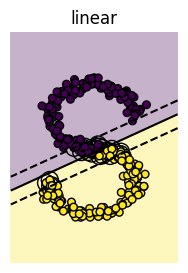

Accuracy Scores: {'linear': 1.0}


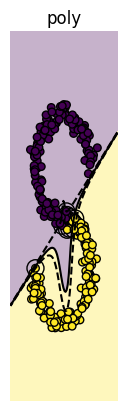

Accuracy Scores: {'linear': 1.0, 'poly': 1.0}


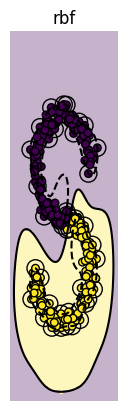

Accuracy Scores: {'linear': 1.0, 'poly': 1.0, 'rbf': 1.0}


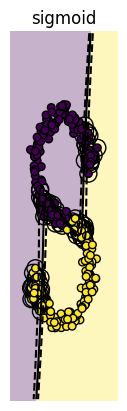

Accuracy Scores: {'linear': 1.0, 'poly': 1.0, 'rbf': 1.0, 'sigmoid': 0.7}


In [26]:
X, y = generate_dataset('scurve', split=2)
kernel_comparison(X,y)

0
1
2
3
4
5
6
7
8
9


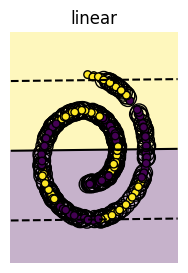

Accuracy Scores: {'linear': 0.5666666666666667}


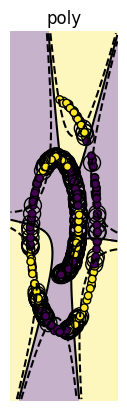

Accuracy Scores: {'linear': 0.5666666666666667, 'poly': 0.7333333333333333}


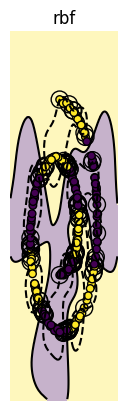

Accuracy Scores: {'linear': 0.5666666666666667, 'poly': 0.7333333333333333, 'rbf': 0.9}


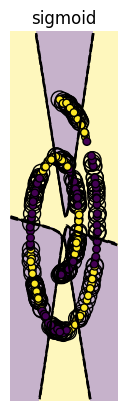

Accuracy Scores: {'linear': 0.5666666666666667, 'poly': 0.7333333333333333, 'rbf': 0.9, 'sigmoid': 0.3}


In [27]:
X, y = generate_dataset('swiss')
kernel_comparison(X,y)

0
1
2
3
4
5
6
7
8
9


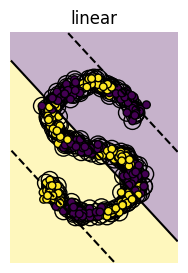

Accuracy Scores: {'linear': 0.6333333333333333}


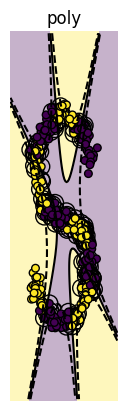

Accuracy Scores: {'linear': 0.6333333333333333, 'poly': 0.8333333333333334}


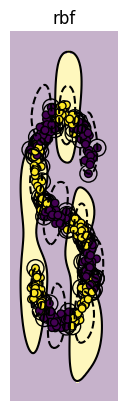

Accuracy Scores: {'linear': 0.6333333333333333, 'poly': 0.8333333333333334, 'rbf': 0.9333333333333333}


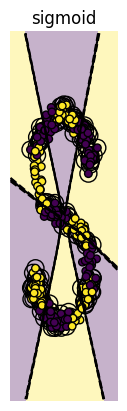

Accuracy Scores: {'linear': 0.6333333333333333, 'poly': 0.8333333333333334, 'rbf': 0.9333333333333333, 'sigmoid': 0.43333333333333335}


In [28]:
X, y = generate_dataset('scurve')
kernel_comparison(X,y)

To summarize the results of the kernel comparison, the results largely matched my expectations. Data with large separation had the highest accuracy. The linear classifier performed better on the moons dataset than I was expecting. The rbf kernel had perhaps the highest average accuracy and was frequently the best for a given dataset.

0
1


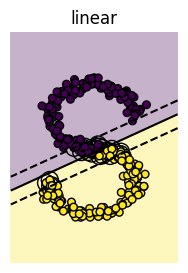

Accuracy Scores: {'linear': 1.0}


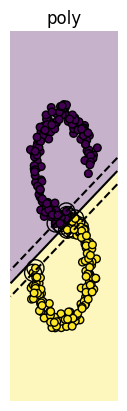

Accuracy Scores: {'linear': 1.0, 'poly': 1.0}


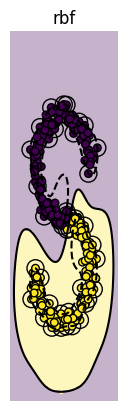

Accuracy Scores: {'linear': 1.0, 'poly': 1.0, 'rbf': 1.0}


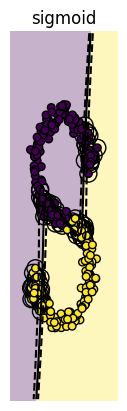

Accuracy Scores: {'linear': 1.0, 'poly': 1.0, 'rbf': 1.0, 'sigmoid': 0.7}


In [31]:
# Examine effect of degree and gamma keyword
X, y = generate_dataset('scurve',split=2)
kernel_comparison(X,y, degree=1)

0
1


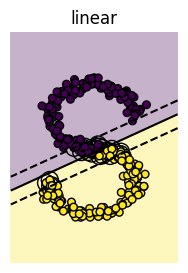

Accuracy Scores: {'linear': 1.0}


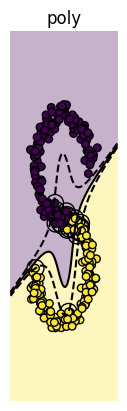

Accuracy Scores: {'linear': 1.0, 'poly': 0.9666666666666667}


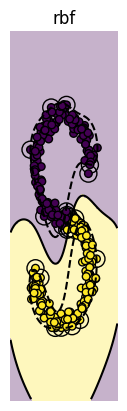

Accuracy Scores: {'linear': 1.0, 'poly': 0.9666666666666667, 'rbf': 1.0}


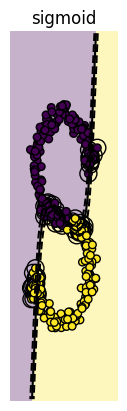

Accuracy Scores: {'linear': 1.0, 'poly': 0.9666666666666667, 'rbf': 1.0, 'sigmoid': 0.8}


In [32]:
X, y = generate_dataset('scurve', split=2)
kernel_comparison(X,y, gamma=1)

The `degree` argument affects the polynomial kernel. It changes the model by changing the degree of the polynomial. This affects the model's bias-variance tradeoff by reducing bias and increasing variability as the order of the polynomial increases. 

As one increases the `degree`, the decision boundary becomes more flexible. 

The `gamma` argument affects both the polynomial kernel and the radial basis function kernel. It changes the model by altering the number of obervations or the influence a point has on affecting the boundary. This affects the model's bias-variance tradeoff by increasing variability and decreasing bias as gamma increases. 

As one increases `gamma`, the decision boundary of the polynomial and radial basis function kernels becomes more flexible. 


## Part 2: US Flags

### Part 2.1: Load and explore flags data
The function `load_images` loads the image data from the flags folder and turns each image into a binary (i.e., black and white) array.

1. Load the flags data.
2. Display four flags of your choice in a figure. Use the `matplotlib` commands `subplot` and `imshow` to create a figure with 2x2 flags. Consult the `matplotlib` documentation to find a way set the aspect ratio of your displayed flags to match their original aspect ratio. Update your code accordingly.

In [3]:
def load_images(folder):
    images = []
    labels = []
    for filename in os.listdir(folder):
        if filename.endswith(".png"):
            img_path = os.path.join(folder, filename)
            img = Image.open(img_path).convert('L')  # Convert image to black and white
            img = np.array(img)//(256/2) # Convert to BW
            images.append(img)
            labels.append(filename.split('.')[0])  # Extract the state code as label
    return images, labels

C:\Users\cmeri\miniconda3\lib\site-packages\PIL\Image.py:992: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


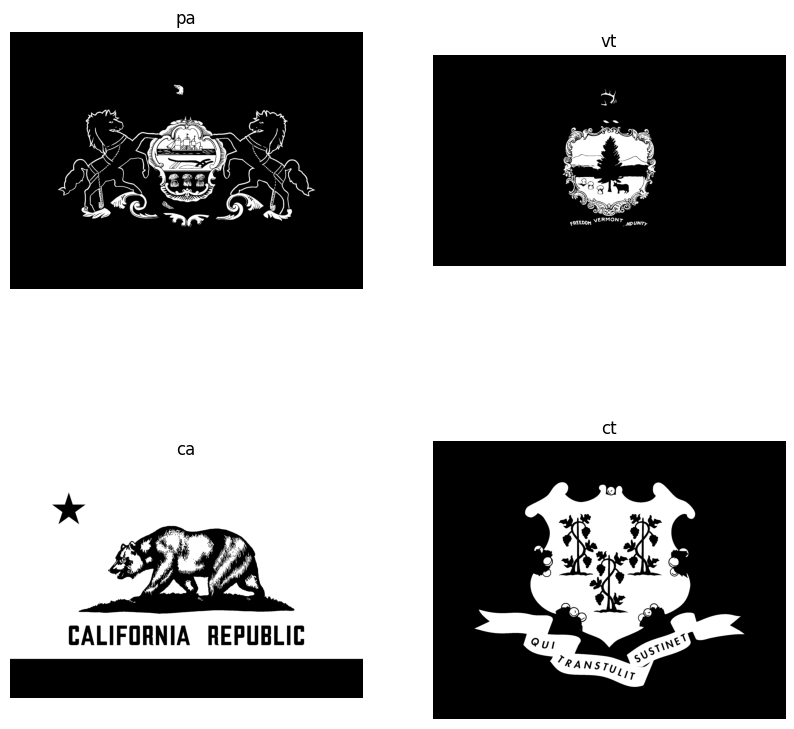

In [4]:
# Display four black-and-white flags in a 2x2 grid
path = "C:/Users/cmeri/OneDrive - Dartmouth College/Math_76/Assignment5/weekly-projects/week5/flags"

images, labels = load_images(path)

# Choose four flags to display
indices = [37, 45, 4, 6]  # Update with the indices of the flags you want to display
selected_images = [images[i] for i in indices]
selected_labels = [labels[i] for i in indices]

# Display the flags
fig, axes = plt.subplots(2, 2, figsize=(10, 10))

for ax, img, label in zip(axes.flat, selected_images, selected_labels):
    ax.imshow(img, cmap='gray')
    ax.set_title(label)
    ax.axis('off')
    ax.set_aspect('equal') 


### Part 2.2: SVMs for flag pixel data
The function `sample_pixels` samples a pixel from a given image uniformly at random. 

1. Use the `sample_pixels`  function to generate synthetic data sets of pixels from for a flag image.
2. Update the `kernel_comparison` function so that if `if_flag` is `True` the decision boundaries are plotted in a 2x2 grid of subplots with plot ranges matching the height and width of the flags.
3. Show the results of the kernel comparison for the four flags that your previously selected. Use the highest values of `degree` and `gamma` that still run *reasonably fast* on your laptop.
4. Adjust your code so that you can run the quantitative part (i.e., the calculation of train and test accuracy) without plotting the decision boundaries. Run the adjusted code on all flags to indentify for each kernel the flags that yield to best easiest-to-classify and hardest-to-classify data sets. Test how the number of of pixels sampled affects your results.

In [5]:
def sample_pixels(image, num_samples=100):
    pixel_data = []
    pixel_labels = []
    height, width = image.shape
    for _ in range(num_samples):
        x1 = random.randint(0, width - 1)
        x2 = random.randint(0, height - 1)
        pixel_data.append([x1/width-0.5, x2/width-0.5])
        pixel_labels.append(image[x2,x1])
    return np.array(pixel_data), np.array(pixel_labels, dtype=int)

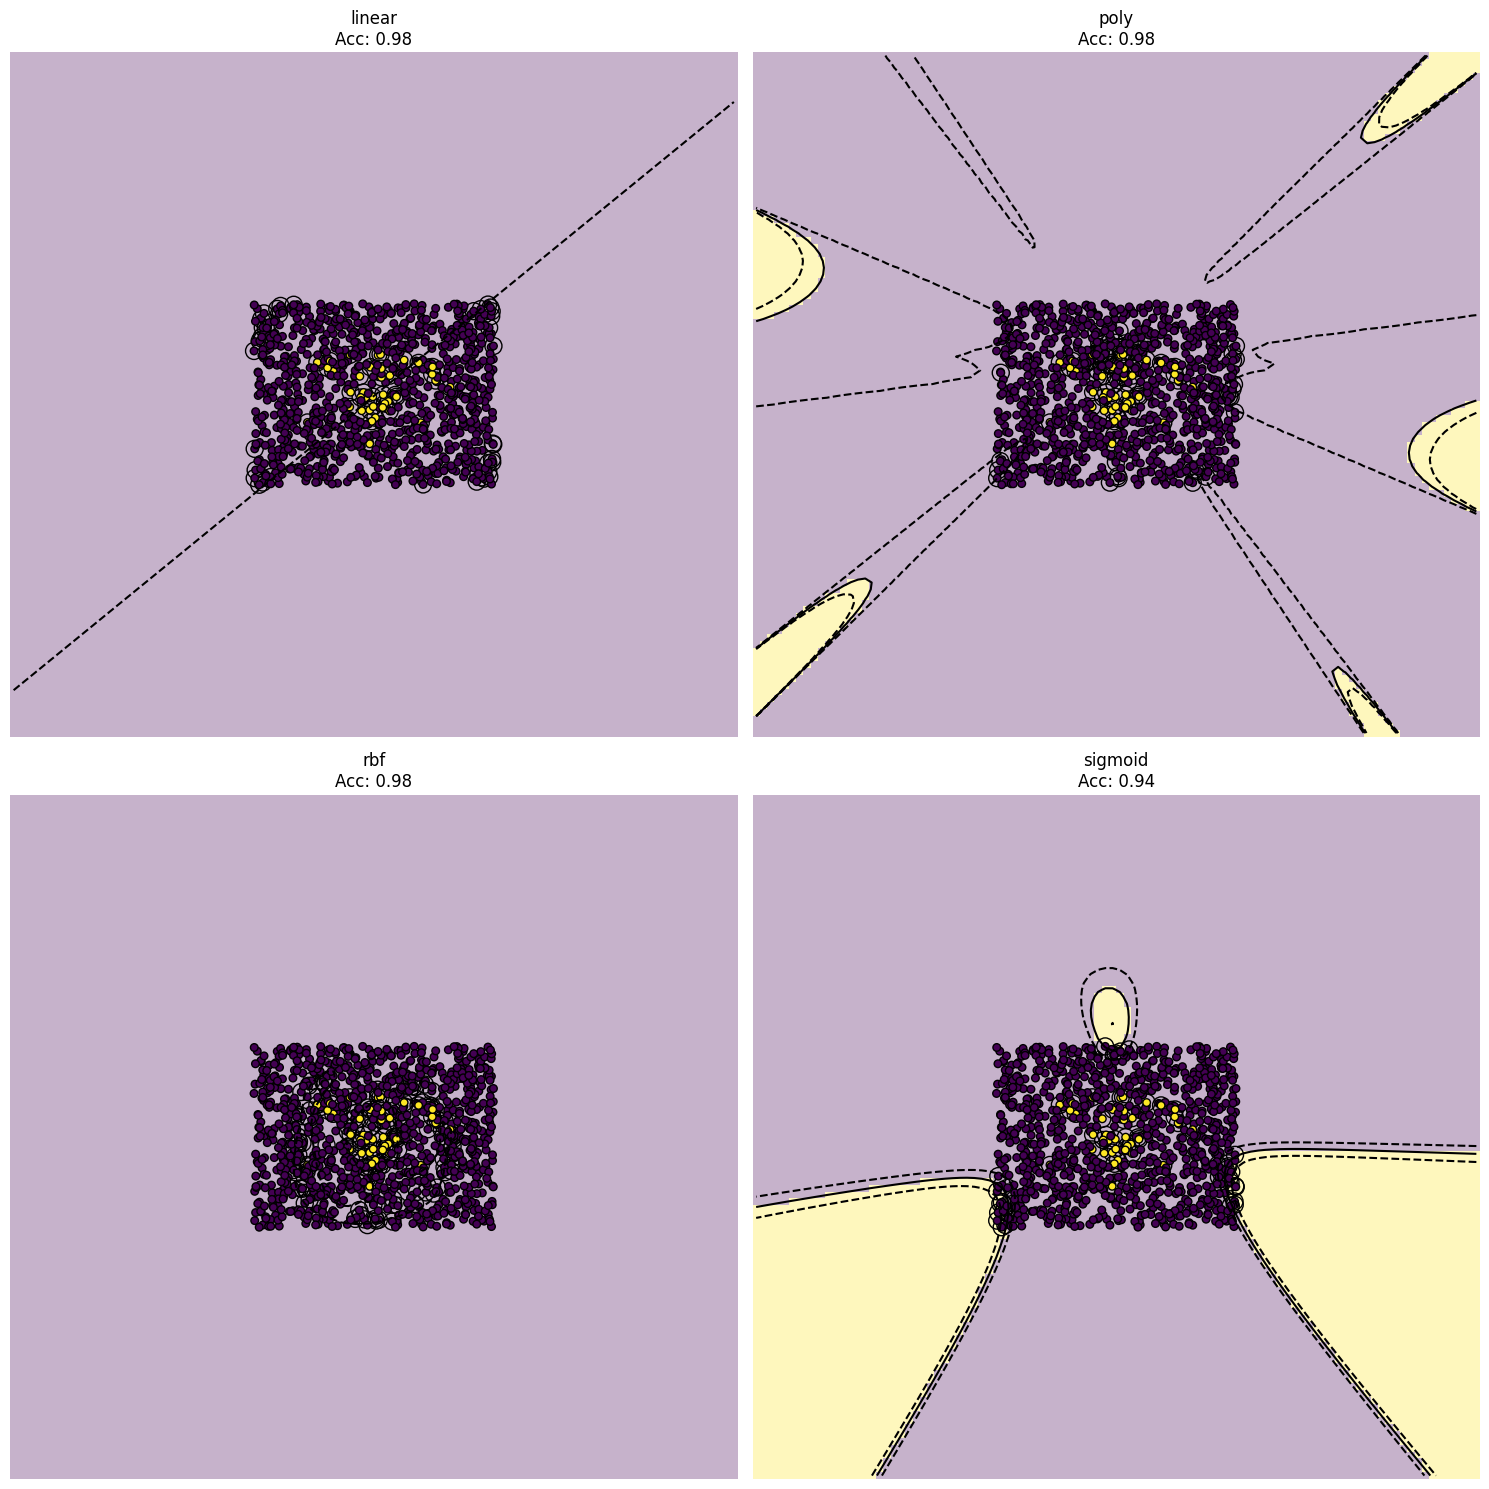

Accuracy Scores for pa: {'linear': 0.98, 'poly': 0.98, 'rbf': 0.98, 'sigmoid': 0.94}


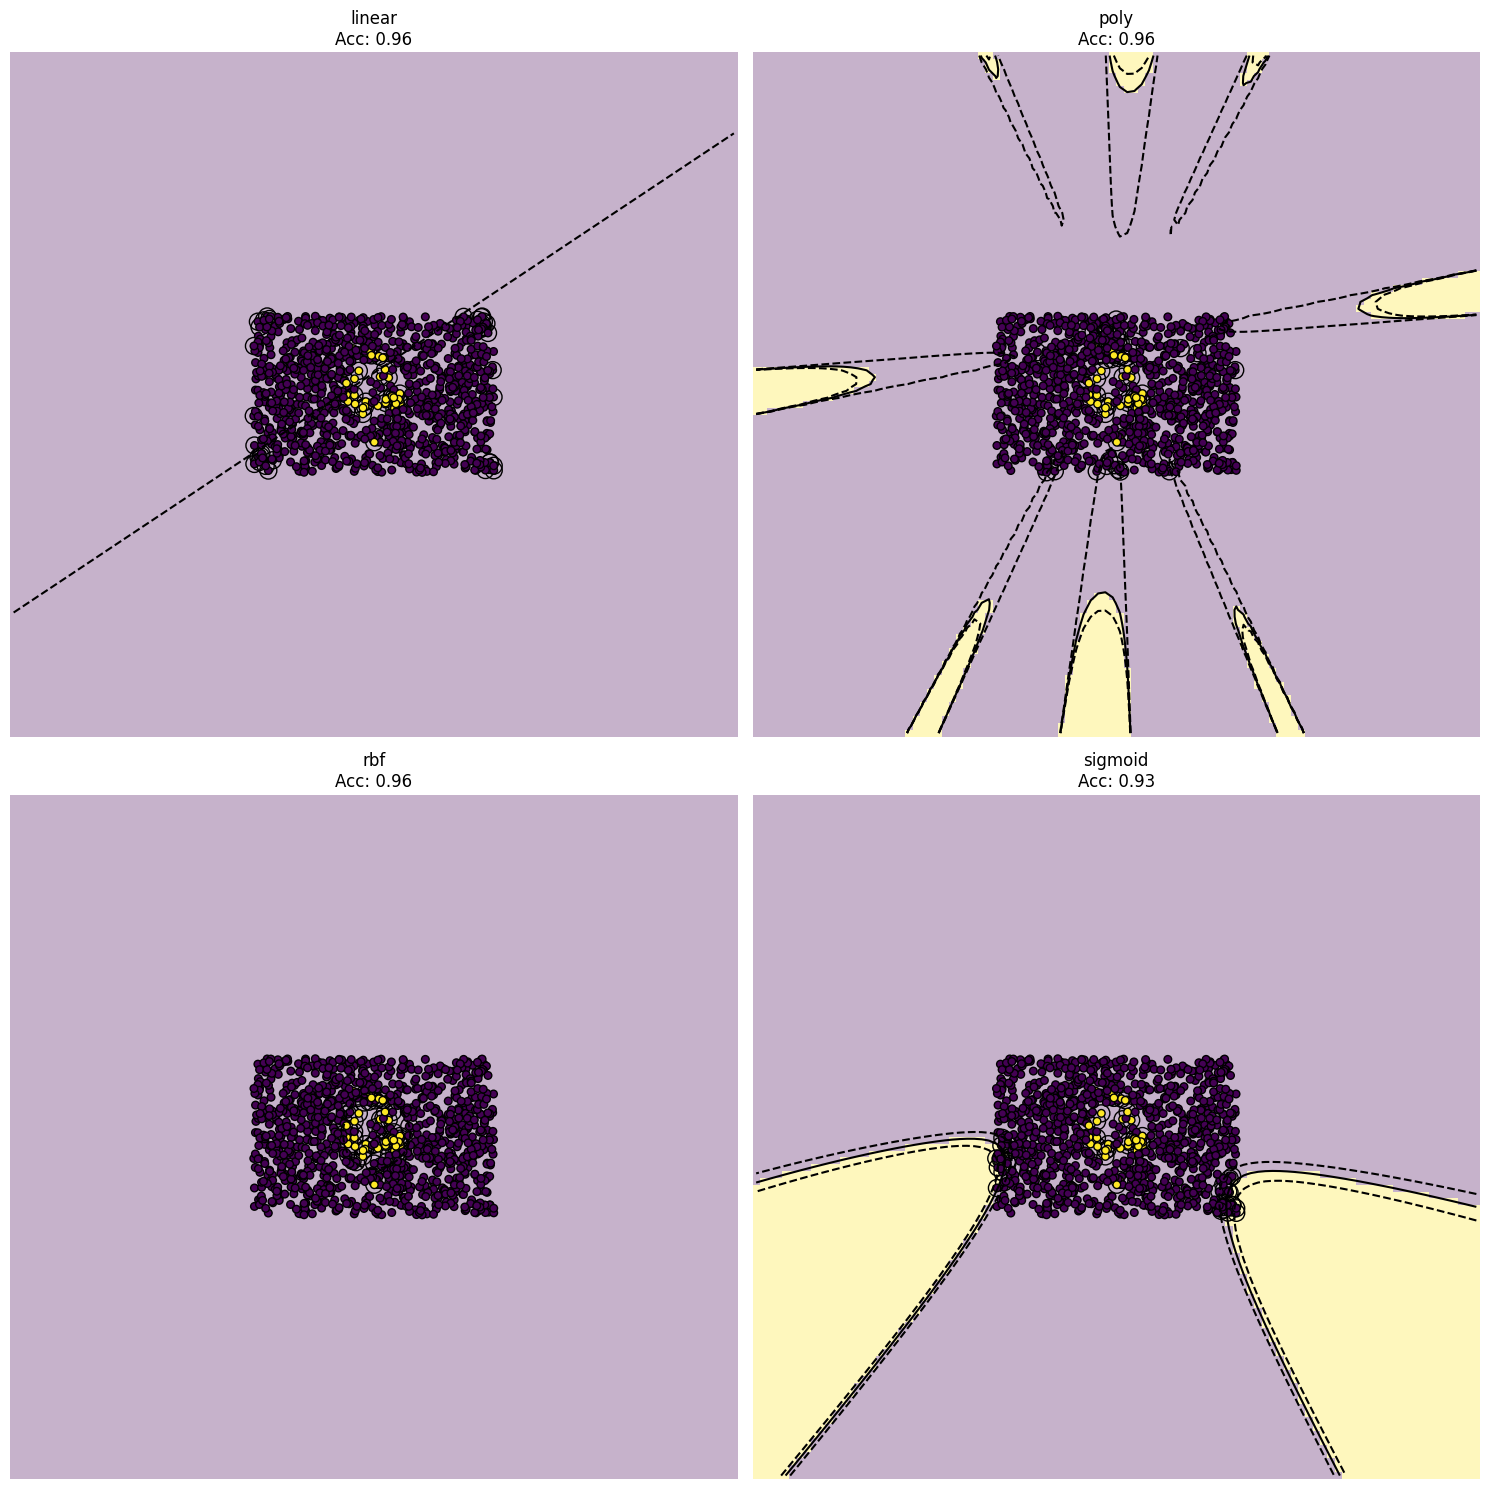

Accuracy Scores for vt: {'linear': 0.96, 'poly': 0.96, 'rbf': 0.96, 'sigmoid': 0.93}


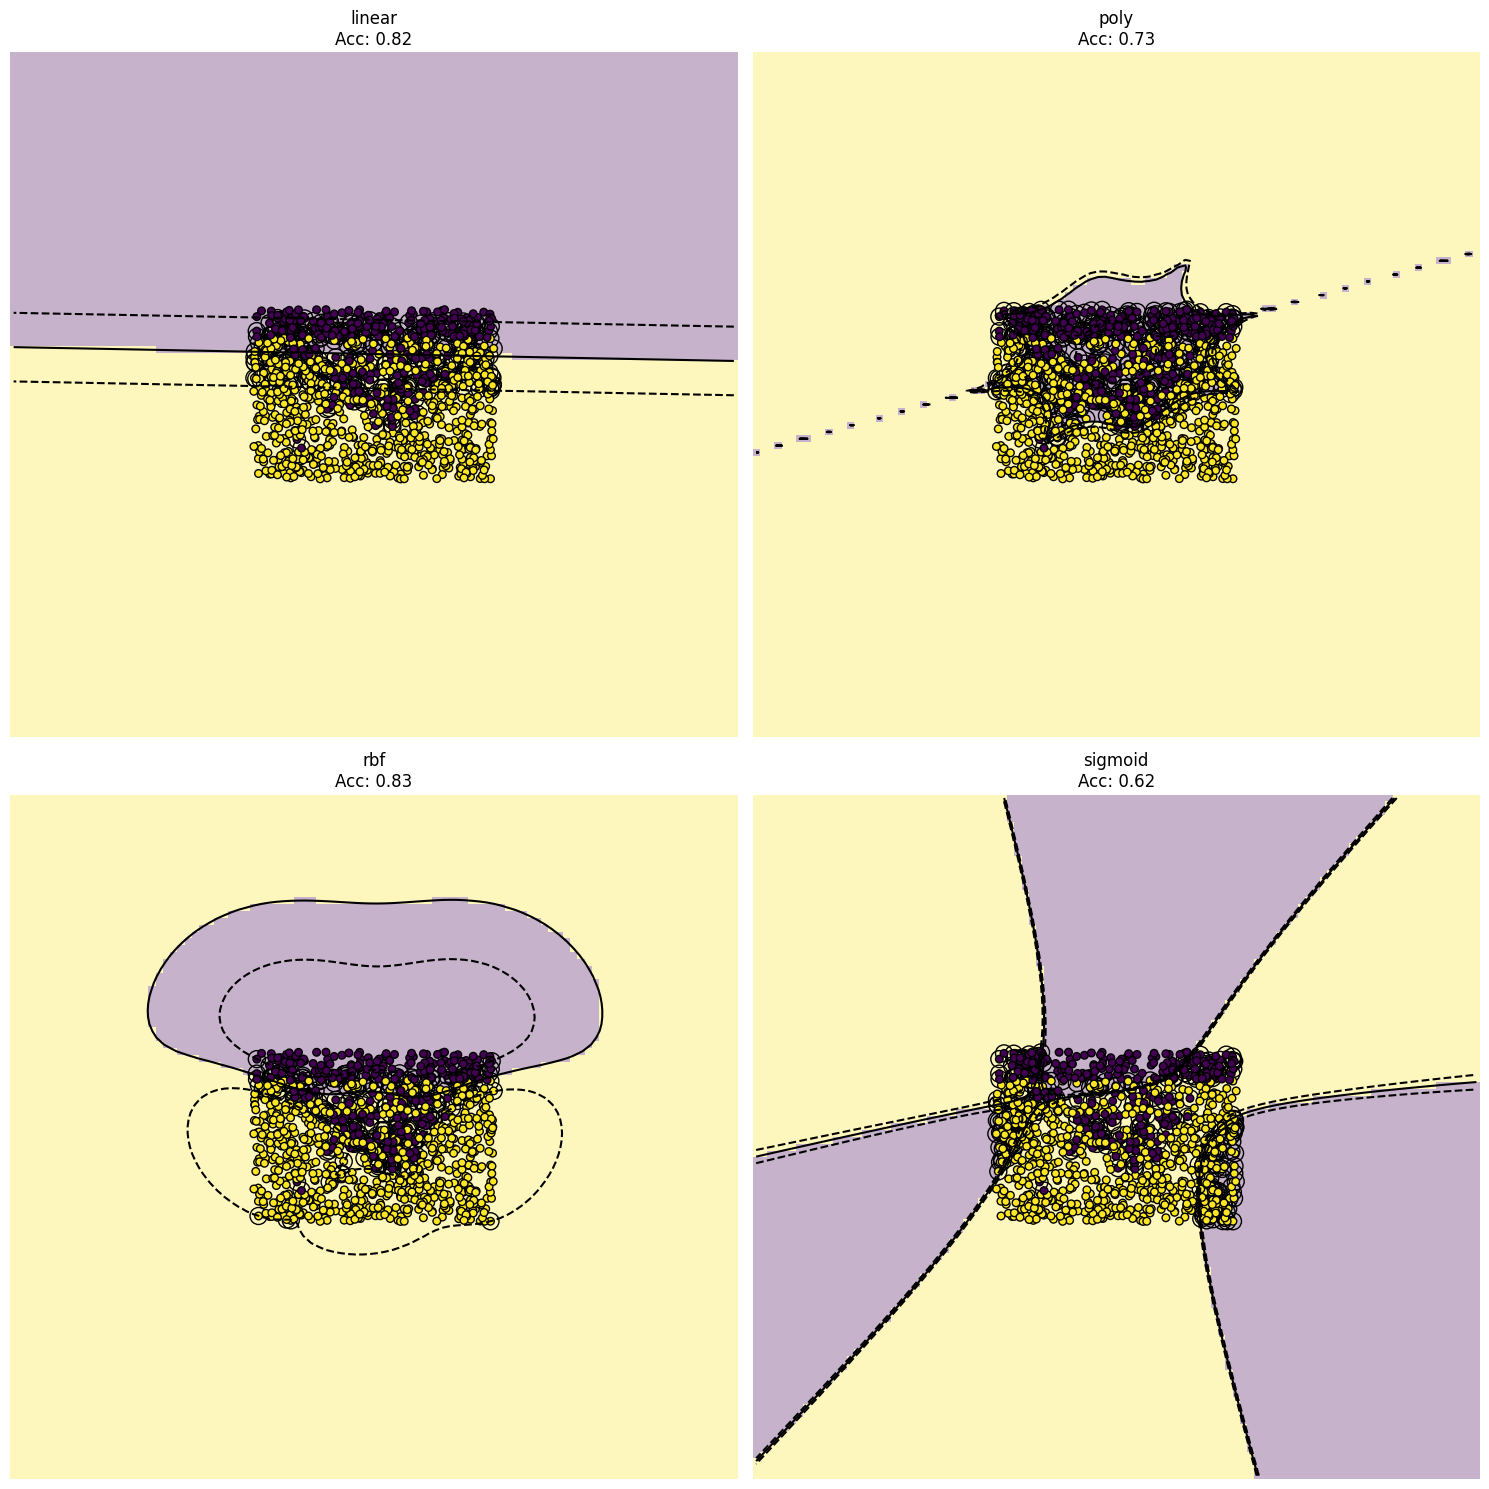

Accuracy Scores for ca: {'linear': 0.82, 'poly': 0.73, 'rbf': 0.83, 'sigmoid': 0.62}


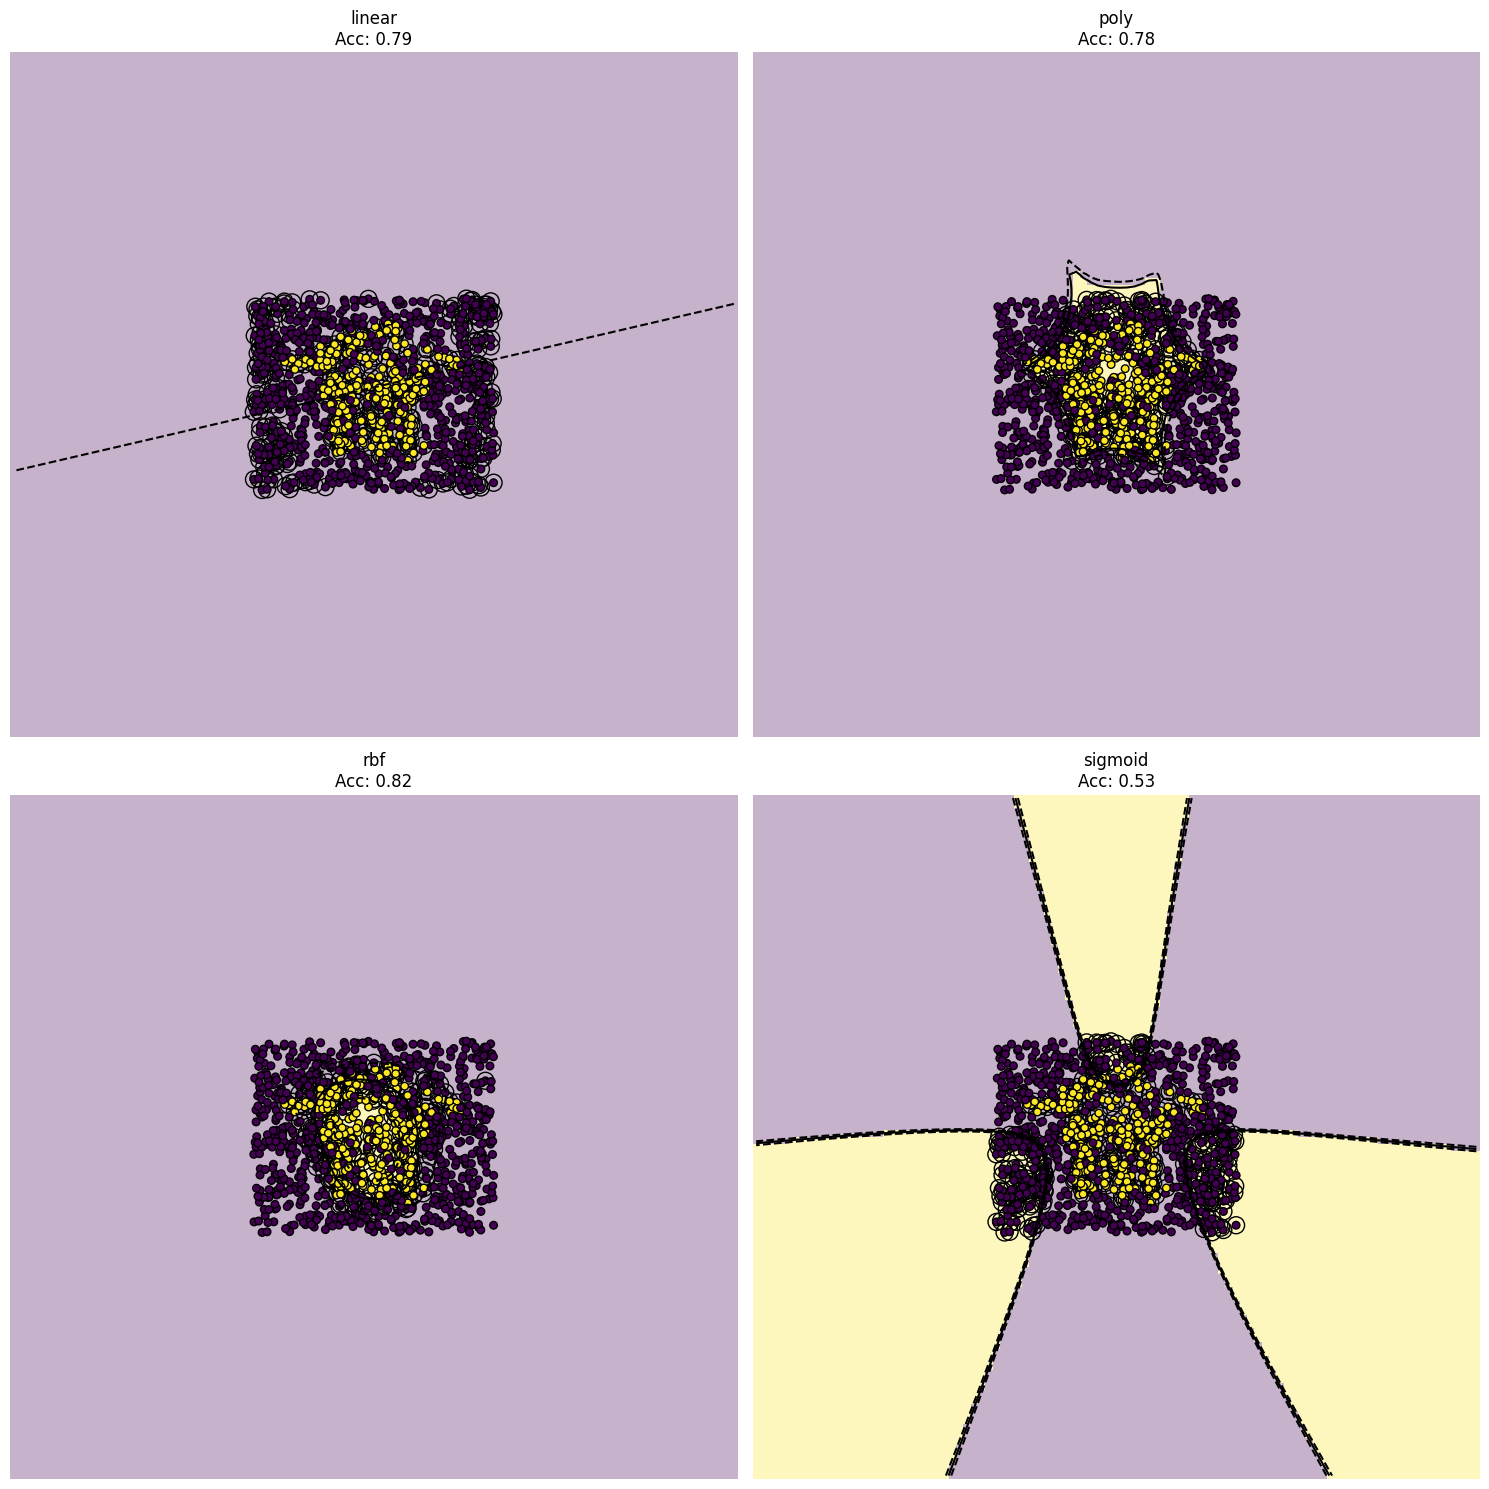

Accuracy Scores for ct: {'linear': 0.79, 'poly': 0.78, 'rbf': 0.82, 'sigmoid': 0.53}


In [19]:
# Visual kernel comparison for selected flags
def kernel_comparison(X, y, support_vectors=True, tight_box=False, if_flag=False, plot=True, gamma=10, degree=10):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=7)

    accuracy_scores = {}
    fig, axes = None, None
    if plot:
        fig, axes = plt.subplots(2, 2, figsize=(15, 15))

    for ikernel, kernel in enumerate(['linear', 'poly', 'rbf', 'sigmoid']):
        # Check if there are at least two classes
        if len(np.unique(y_train)) < 2:
            accuracy_scores[kernel] = np.nan
            continue
        
        # Train the SVC
        clf = svm.SVC(kernel=kernel, degree=degree, gamma=gamma).fit(X_train, y_train)
        
        # Predict and calculate accuracy
        y_pred = clf.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_scores[kernel] = accuracy

        if plot:
            # Settings for plotting
            ax = axes.flat[ikernel]
            common_params = {"estimator": clf, "X": X, "ax": ax}
            DecisionBoundaryDisplay.from_estimator(
                **common_params,
                response_method="predict",
                plot_method="pcolormesh",
                alpha=0.3,
            )
            DecisionBoundaryDisplay.from_estimator(
                **common_params,
                response_method="decision_function",
                plot_method="contour",
                levels=[-1, 0, 1],
                colors=["k", "k", "k"],
                linestyles=["--", "-", "--"],
            )

            if support_vectors:
                # Plot bigger circles around samples that serve as support vectors
                ax.scatter(
                    clf.support_vectors_[:, 0],
                    clf.support_vectors_[:, 1],
                    s=150,
                    facecolors="none",
                    edgecolors="k",
                )

            # Plot samples by color and add legend
            ax.scatter(X[:, 0], X[:, 1], c=y, s=30, edgecolors="k")
            ax.set_title(f"{kernel}\nAcc: {accuracy:.2f}")
            ax.axis('off')
            if tight_box:
                ax.set_xlim([X[:, 0].min(), X[:, 0].max()])
                ax.set_ylim([X[:, 1].min(), X[:, 1].max()])

    if plot:
        plt.tight_layout()
        plt.show()

    return accuracy_scores

for img, label in zip(selected_images, selected_labels):
    X, y = sample_pixels(img, num_samples=1000)
    accuracy_scores = kernel_comparison(X, y, if_flag=True, gamma=10, degree=10)
    print(f"Accuracy Scores for {label}:", accuracy_scores)

In [24]:
import pandas as pd

results_df = pd.DataFrame(columns=['Flag', 'Kernel', 'Num_Samples', 'Accuracy'])

for img, label in zip(images, labels):
    for num_samples in [300]: # Reduced from original list
        X, y = sample_pixels(img, num_samples=num_samples)
        accuracy_scores = kernel_comparison(X, y, plot=False, gamma=7, degree=7)
        for kernel, accuracy in accuracy_scores.items():
            results_df = pd.concat([results_df, pd.DataFrame({'Flag': [label], 'Kernel': [kernel], 'Num_Samples': [num_samples], 'Accuracy': [accuracy]})], ignore_index=True)

# Display the results
print(results_df)

# Identify easiest and hardest to classify
easiest_to_classify = {}
hardest_to_classify = {}

for kernel in ['linear', 'poly', 'rbf', 'sigmoid']:
    kernel_df = results_df[results_df['Kernel'] == kernel]
    if not kernel_df.empty:
        max_idx = kernel_df['Accuracy'].idxmax()
        min_idx = kernel_df['Accuracy'].idxmin()
        if pd.notna(max_idx):
            easiest_to_classify[kernel] = kernel_df.loc[max_idx]
        if pd.notna(min_idx):
            hardest_to_classify[kernel] = kernel_df.loc[min_idx]

print("Easiest to Classify:", easiest_to_classify)
print("Hardest to Classify:", hardest_to_classify)

C:\Users\cmeri\AppData\Local\Temp\ipykernel_29828\665731676.py:10: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, pd.DataFrame({'Flag': [label], 'Kernel': [kernel], 'Num_Samples': [num_samples], 'Accuracy': [accuracy]})], ignore_index=True)


    Flag   Kernel Num_Samples  Accuracy
0     ak   linear         300  1.000000
1     ak     poly         300  1.000000
2     ak      rbf         300  1.000000
3     ak  sigmoid         300  1.000000
4     al   linear         300  0.533333
..   ...      ...         ...       ...
195   wv  sigmoid         300  0.366667
196   wy   linear         300  0.866667
197   wy     poly         300  0.866667
198   wy      rbf         300  0.866667
199   wy  sigmoid         300  0.666667

[200 rows x 4 columns]
Easiest to Classify: {'linear': Flag               ak
Kernel         linear
Num_Samples       300
Accuracy          1.0
Name: 0, dtype: object, 'poly': Flag             ak
Kernel         poly
Num_Samples     300
Accuracy        1.0
Name: 1, dtype: object, 'rbf': Flag            ak
Kernel         rbf
Num_Samples    300
Accuracy       1.0
Name: 2, dtype: object, 'sigmoid': Flag                ak
Kernel         sigmoid
Num_Samples        300
Accuracy           1.0
Name: 3, dtype: object}
Hardes

In [25]:
top_3_df = pd.DataFrame(columns=['Flag', 'Kernel', 'Num_Samples', 'Accuracy'])

for kernel in ['linear', 'poly', 'rbf', 'sigmoid']:
    kernel_df = results_df[results_df['Kernel'] == kernel].nlargest(3, 'Accuracy')
    top_3_df = pd.concat([top_3_df, kernel_df], ignore_index=True)

print(top_3_df)

   Flag   Kernel Num_Samples  Accuracy
0    ak   linear         300       1.0
1    me   linear         300       1.0
2    nv   linear         300       1.0
3    ak     poly         300       1.0
4    me     poly         300       1.0
5    nv     poly         300       1.0
6    ak      rbf         300       1.0
7    me      rbf         300       1.0
8    nv      rbf         300       1.0
9    ak  sigmoid         300       1.0
10   me  sigmoid         300       1.0
11   nv  sigmoid         300       1.0


C:\Users\cmeri\AppData\Local\Temp\ipykernel_29828\1098788234.py:5: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  top_3_df = pd.concat([top_3_df, kernel_df], ignore_index=True)


In [26]:
bottom_3_df = pd.DataFrame(columns=['Flag', 'Kernel', 'Num_Samples', 'Accuracy'])

for kernel in ['linear', 'poly', 'rbf', 'sigmoid']:
    kernel_df = results_df[results_df['Kernel'] == kernel].nsmallest(3, 'Accuracy')
    bottom_3_df = pd.concat([bottom_3_df, kernel_df], ignore_index=True)

print(bottom_3_df)

   Flag   Kernel Num_Samples  Accuracy
0    al   linear         300  0.533333
1    fl   linear         300  0.533333
2    md   linear         300  0.600000
3    ct     poly         300  0.633333
4    md     poly         300  0.633333
5    al     poly         300  0.666667
6    md      rbf         300  0.500000
7    al      rbf         300  0.600000
8    fl      rbf         300  0.600000
9    mo  sigmoid         300  0.300000
10   wv  sigmoid         300  0.366667
11   fl  sigmoid         300  0.400000


C:\Users\cmeri\AppData\Local\Temp\ipykernel_29828\4215911736.py:5: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  bottom_3_df = pd.concat([bottom_3_df, kernel_df], ignore_index=True)


For these experiments, I set `num_samples` to 300 because the results of the experiments seem to be the most stable for this number of sampled pixels.

The linear kernel performed best (i.e., highest test accuracy) on the flags of the following three states: 

Alaska, Maine, and Nevada

It performed worst on the flags of the following three states: 

Alabama, Florida, and Maryland

The polynomial kernel performed best on the flags of the following three states: 

Alaska, Maine and Nevada

It performed worst on the flags of the following three states: 

Connecticut, Maryland, and Alabama

The radial-basis function kernel performed best on the flags of the following three states: 

Alaska, Maine, and Nevada

It performed worst on the flags of the following three states: 

Maryland, Alabama, Florida

The sigmoid kernel performed best on the flags of the following three states: 

Alaska, Maine, and Nevada

It performed worst on the flags of the following three states:

Missouri, West Virginia, and Florida

### Part 2.3: Comparison to decision trees
Decision trees and SVMs yield substantially different decision boundaries.

1. An arbitrarily complex decision tree would be able to achieve perfect training accuracy on any data set. Explain why.
2. For a very large data set of flag pixels, an arbitrarily complex decision tree is likely to achieve (almost) perfect test accuracy as well. Explain why.
3. Select four flags for which you anticipate a *simple* decision tree to outperform all your SVMs. Write code that fits a decision tree to a flag pixel data set. Use your code to check your hypothesis. 

An arbitrarily complex decision tree would be able to achieve perfect training accuracy on any data set, because splits in the data can be added until every point has its own leaf and is therefore gaurenteed to be correctly classified.

For a very large data set of flag pixels, an arbitrarily complex decision tree is likely to achieve (almost) perfect test accuracy because te larger the training dataset, the more likely it is to be representative of the test data, and the range of flags is fairly limited.

A simple decision tree is likely to perform well on the sampled pixel data of the flags of Alaska, Texas, Washington, and Tennessee.

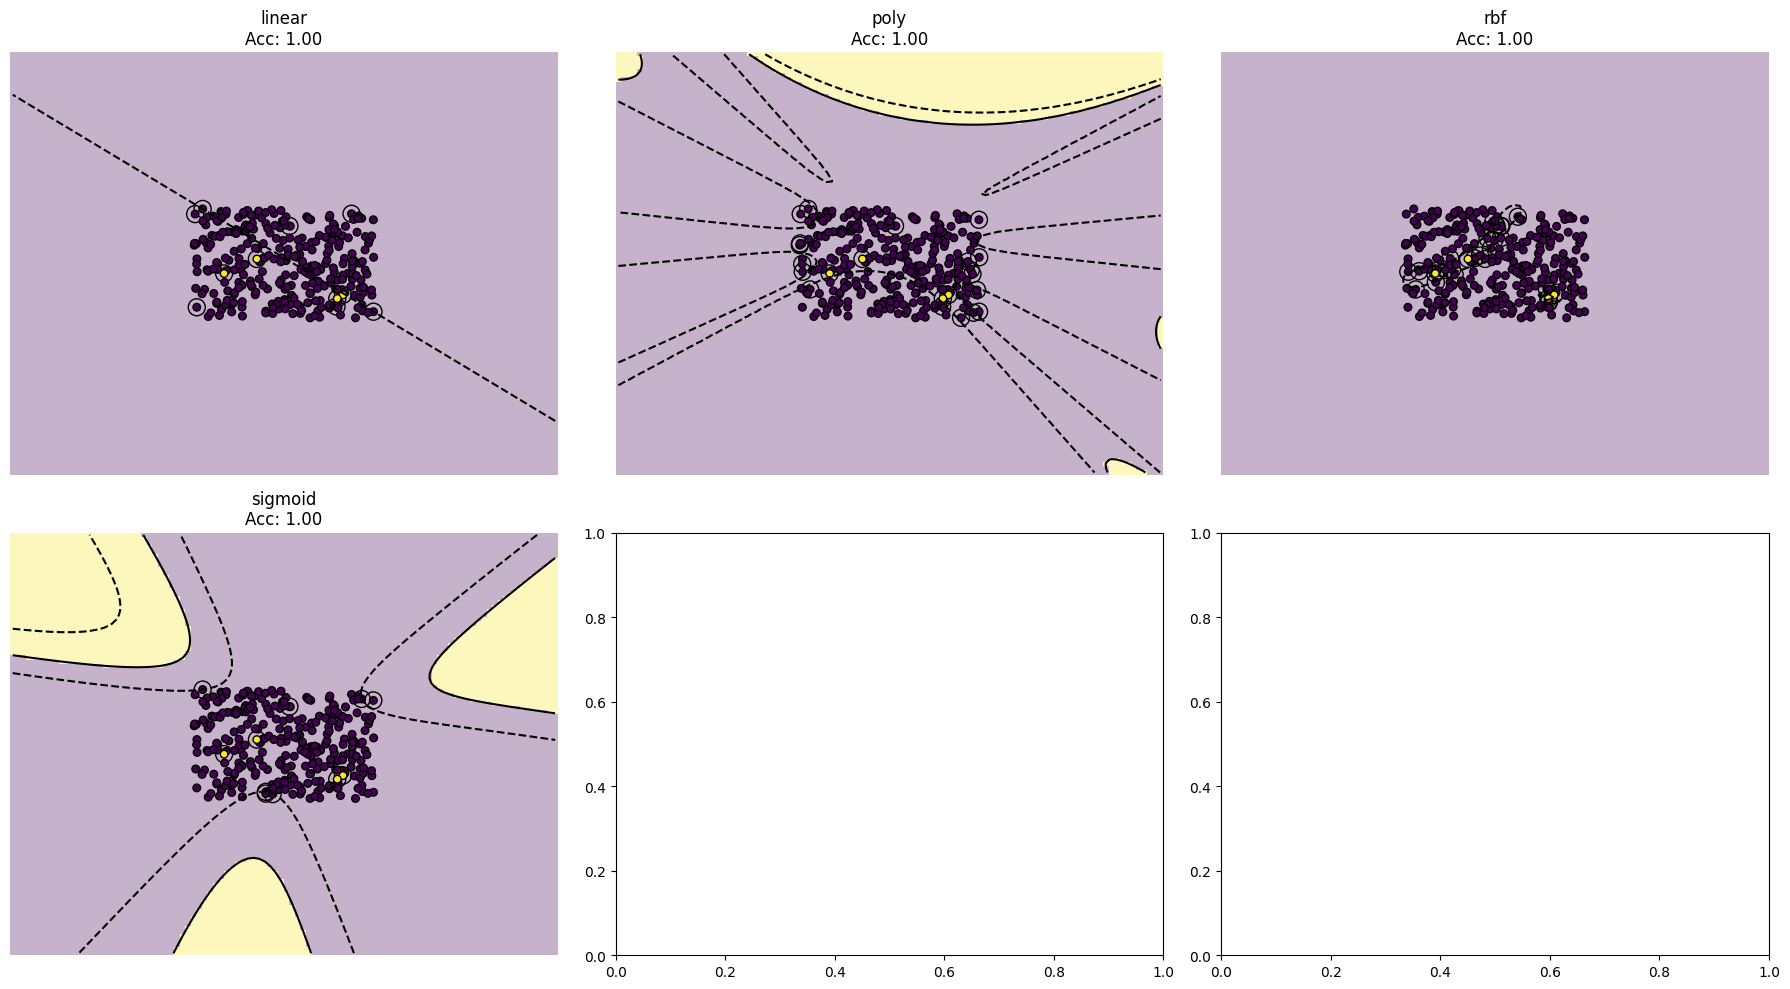

C:\Users\cmeri\AppData\Local\Temp\ipykernel_29828\2654853409.py:124: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, pd.DataFrame({'Flag': [label], 'Model': ['SVM'], 'Kernel': [kernel], 'Num_Samples': [num_samples], 'Accuracy': [accuracy]})], ignore_index=True)


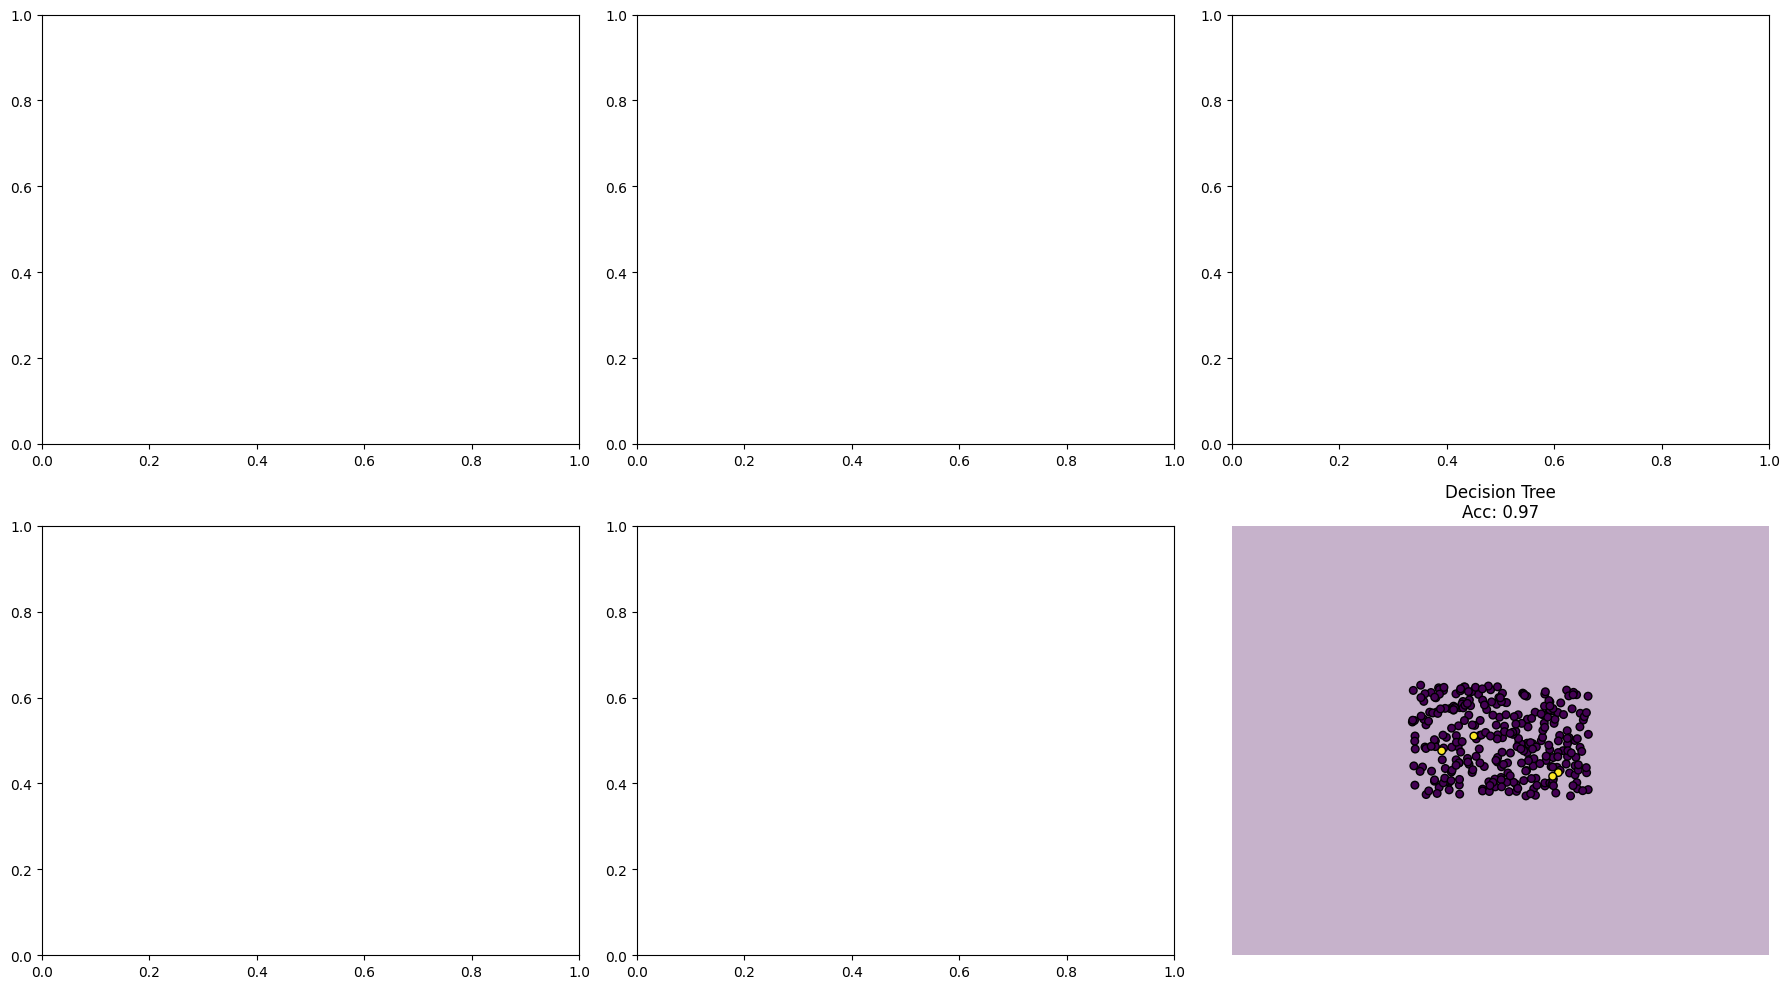

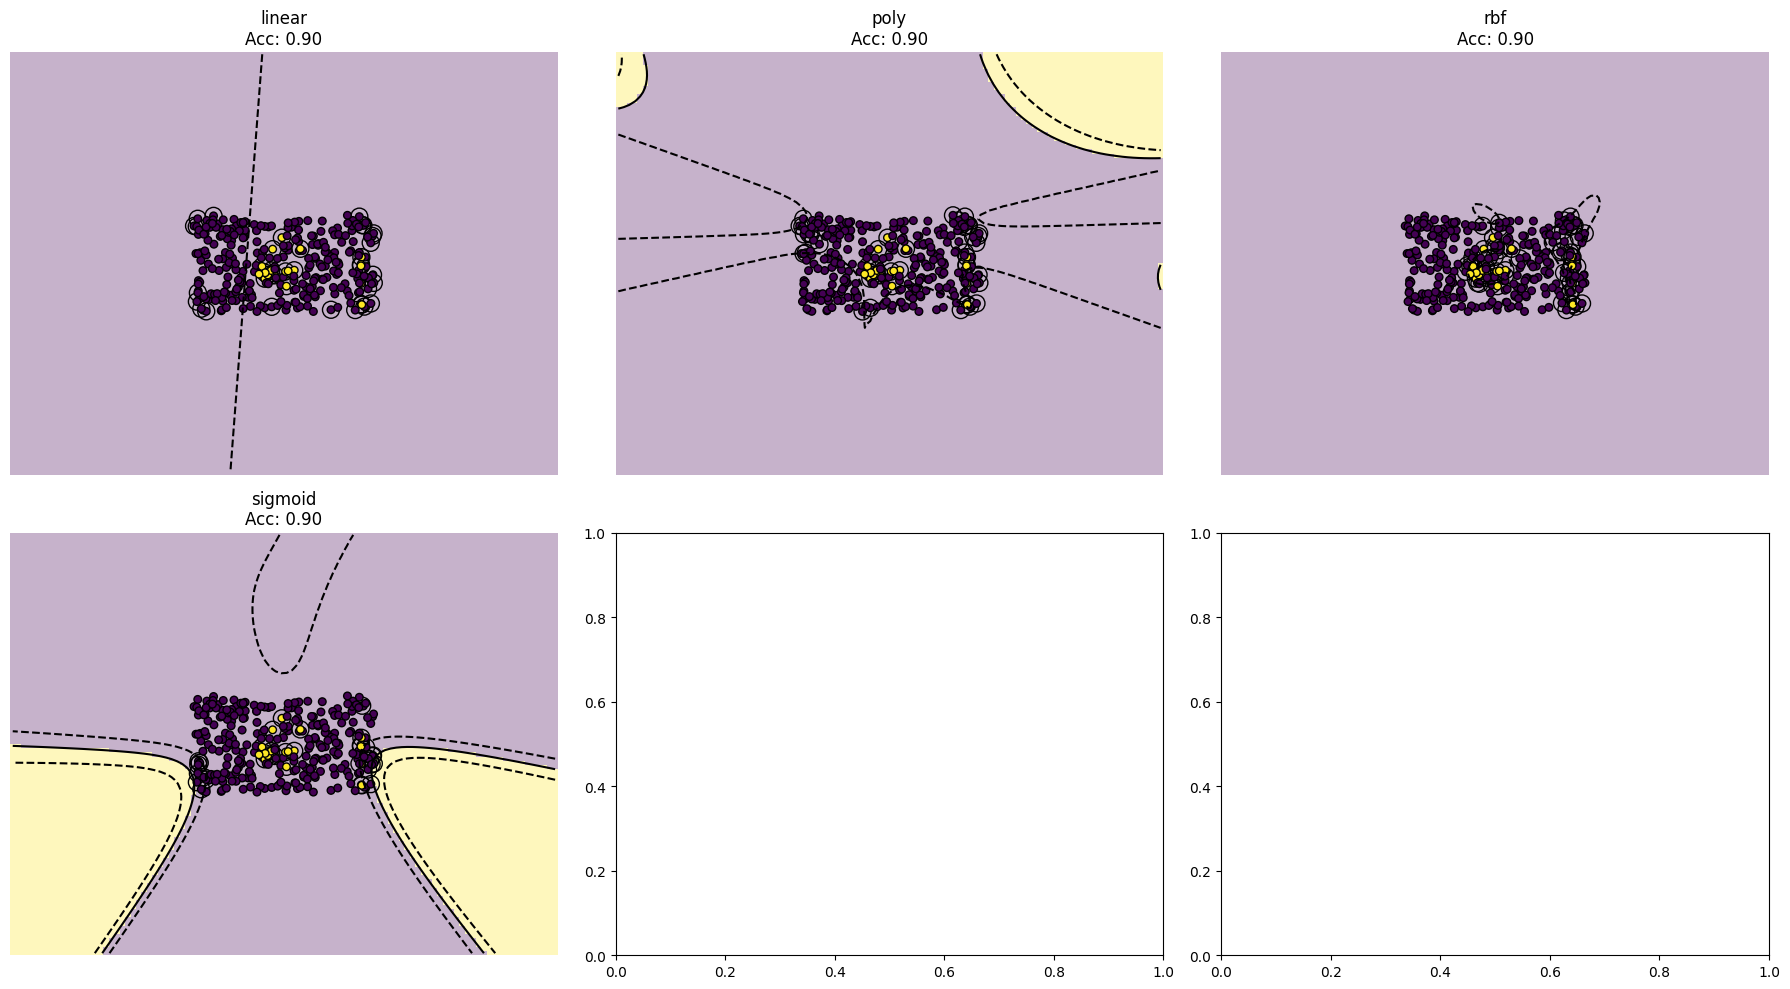

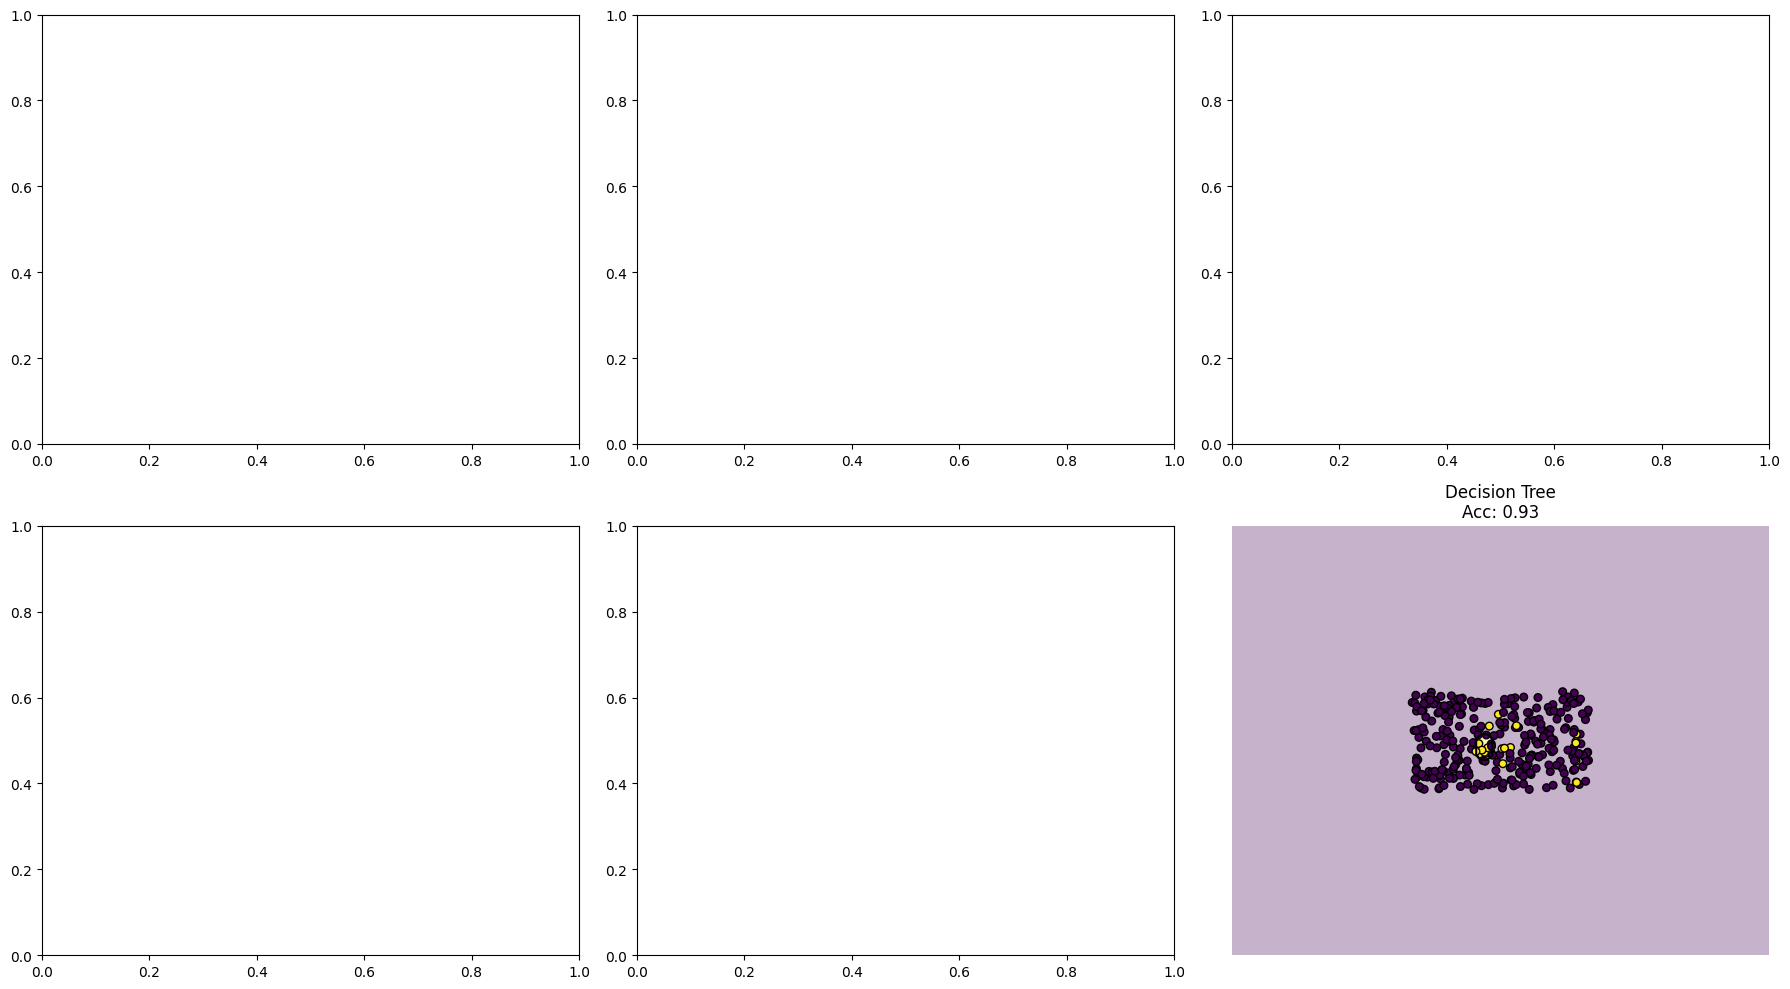

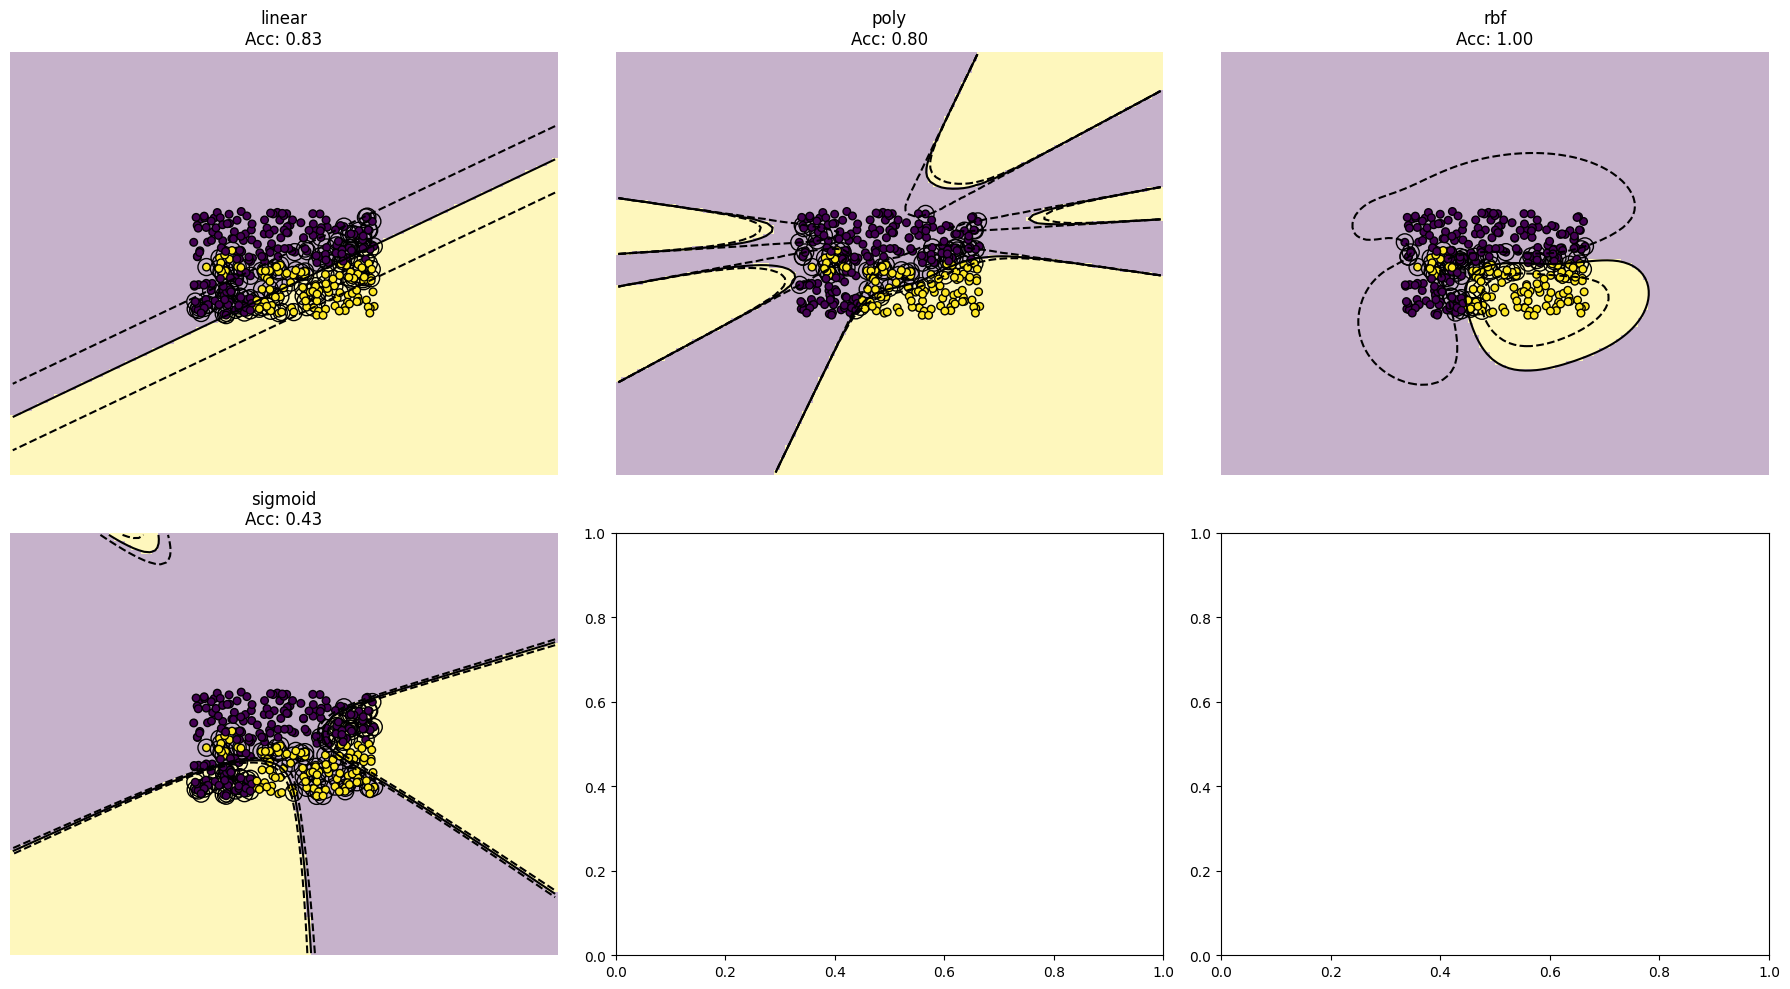

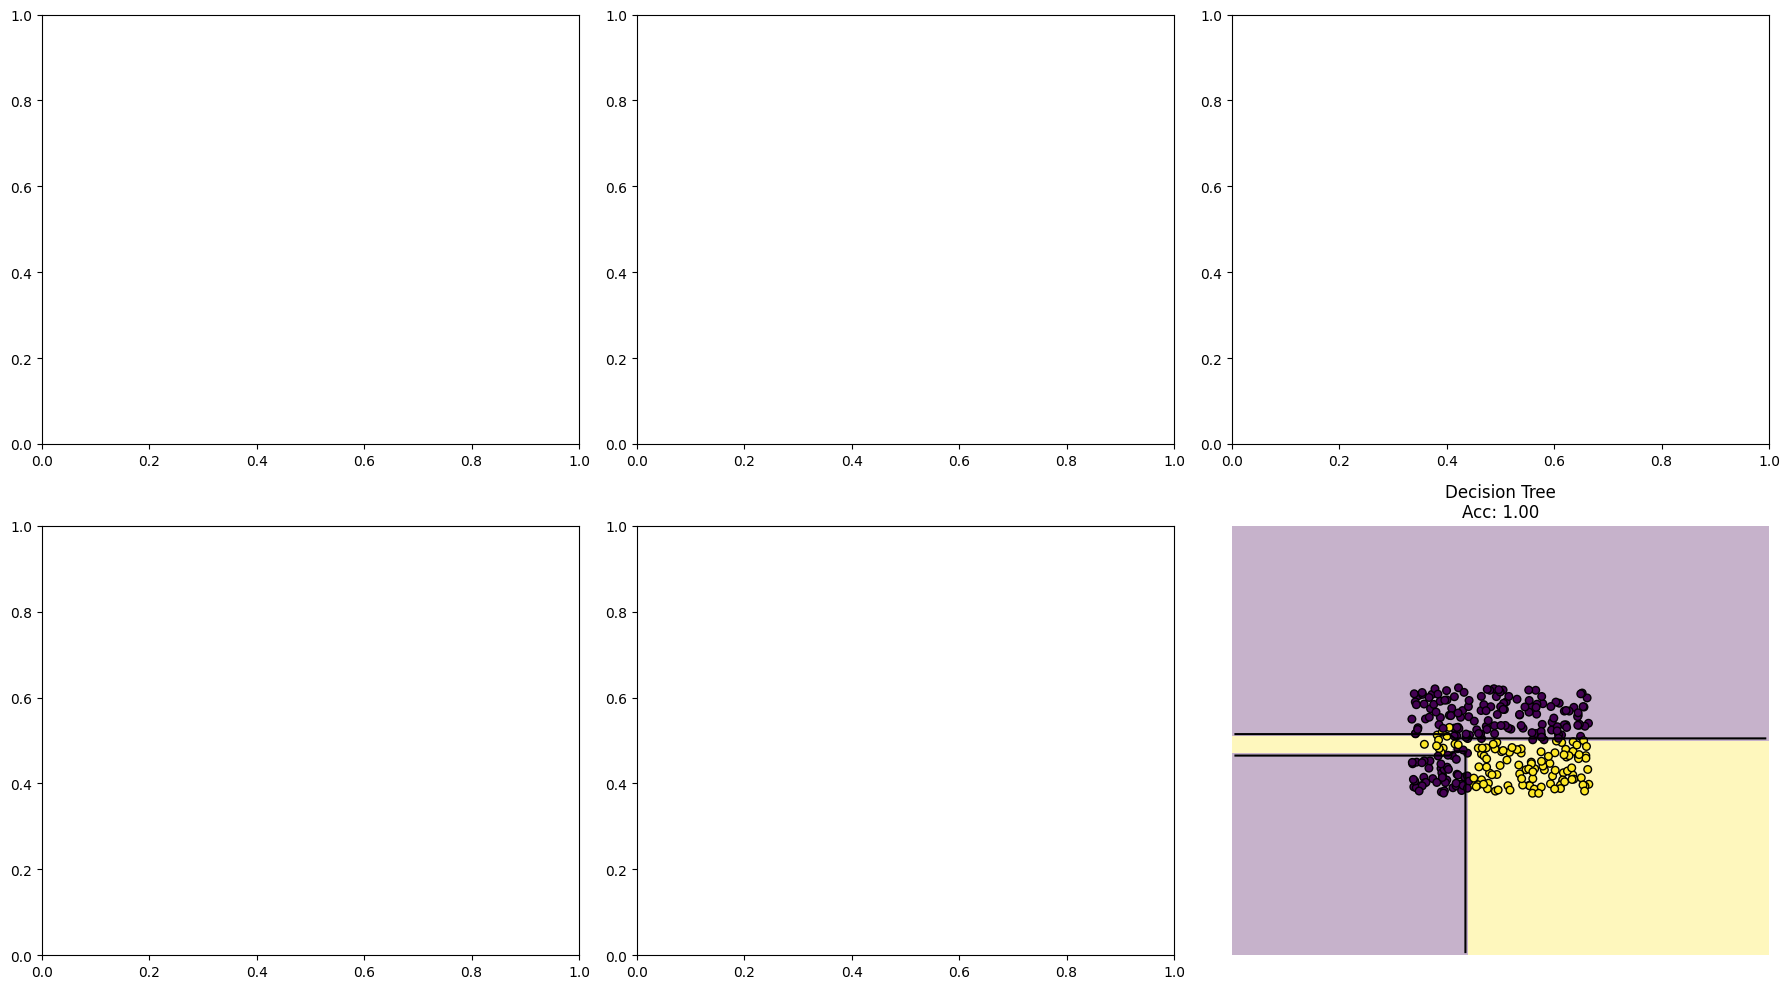

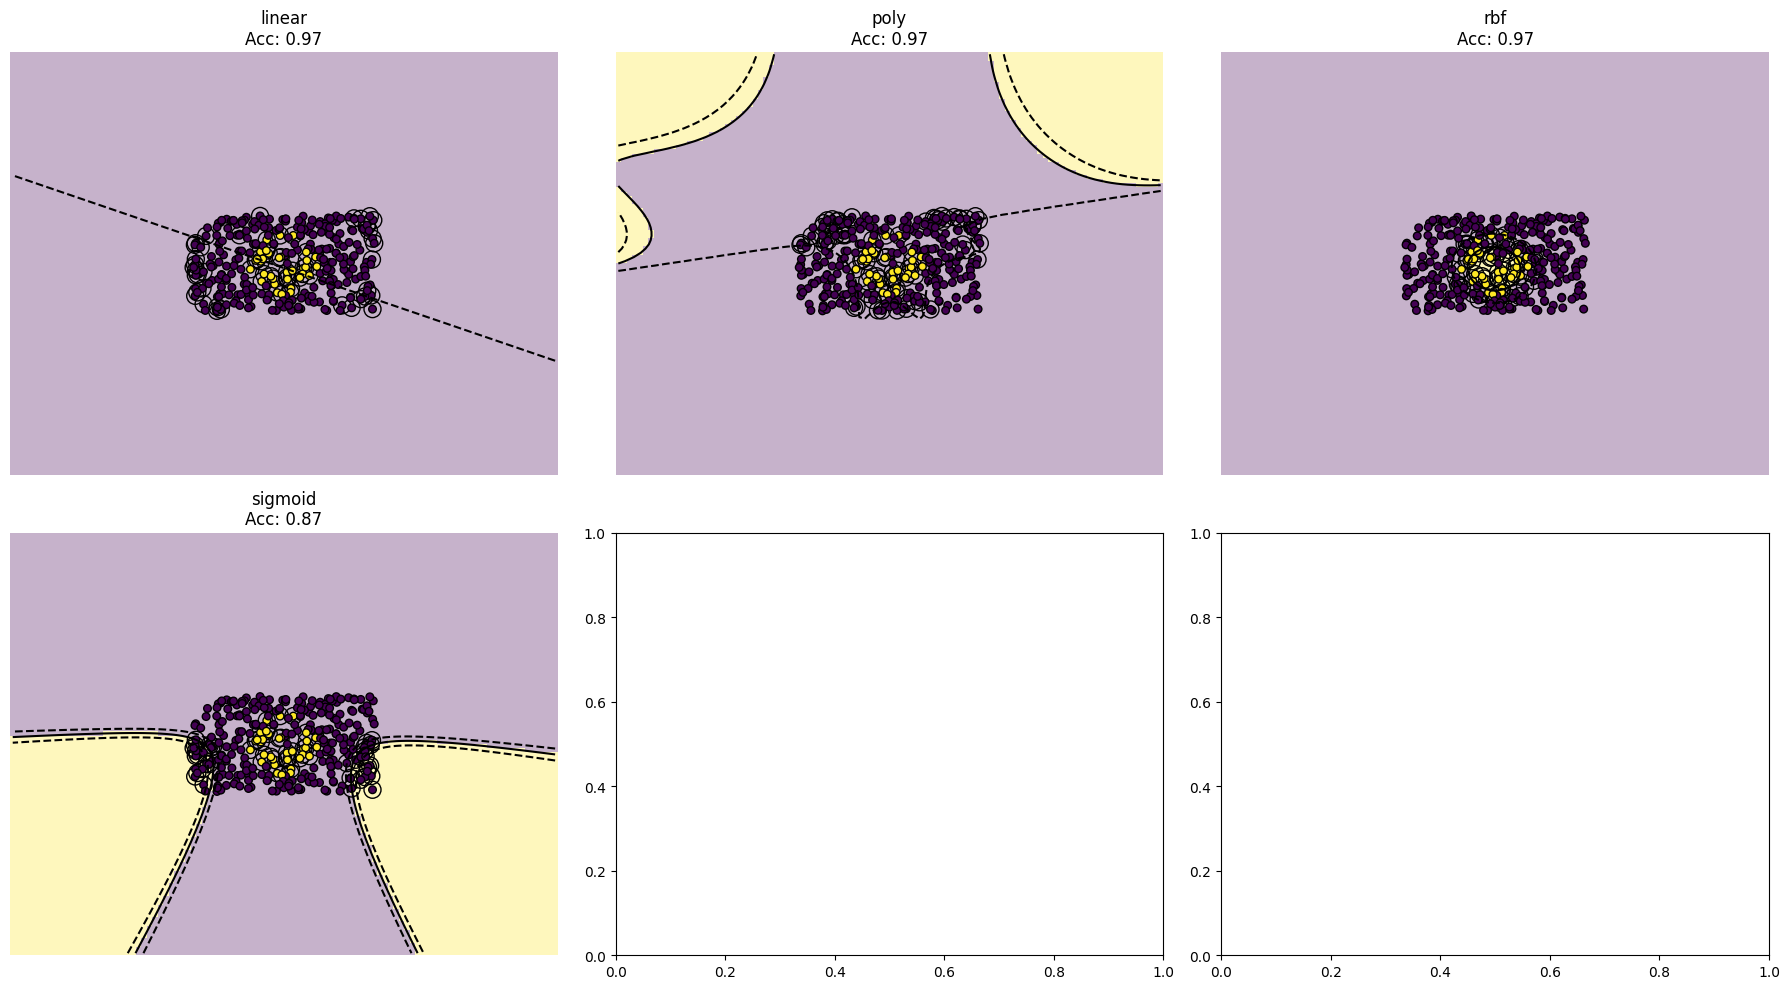

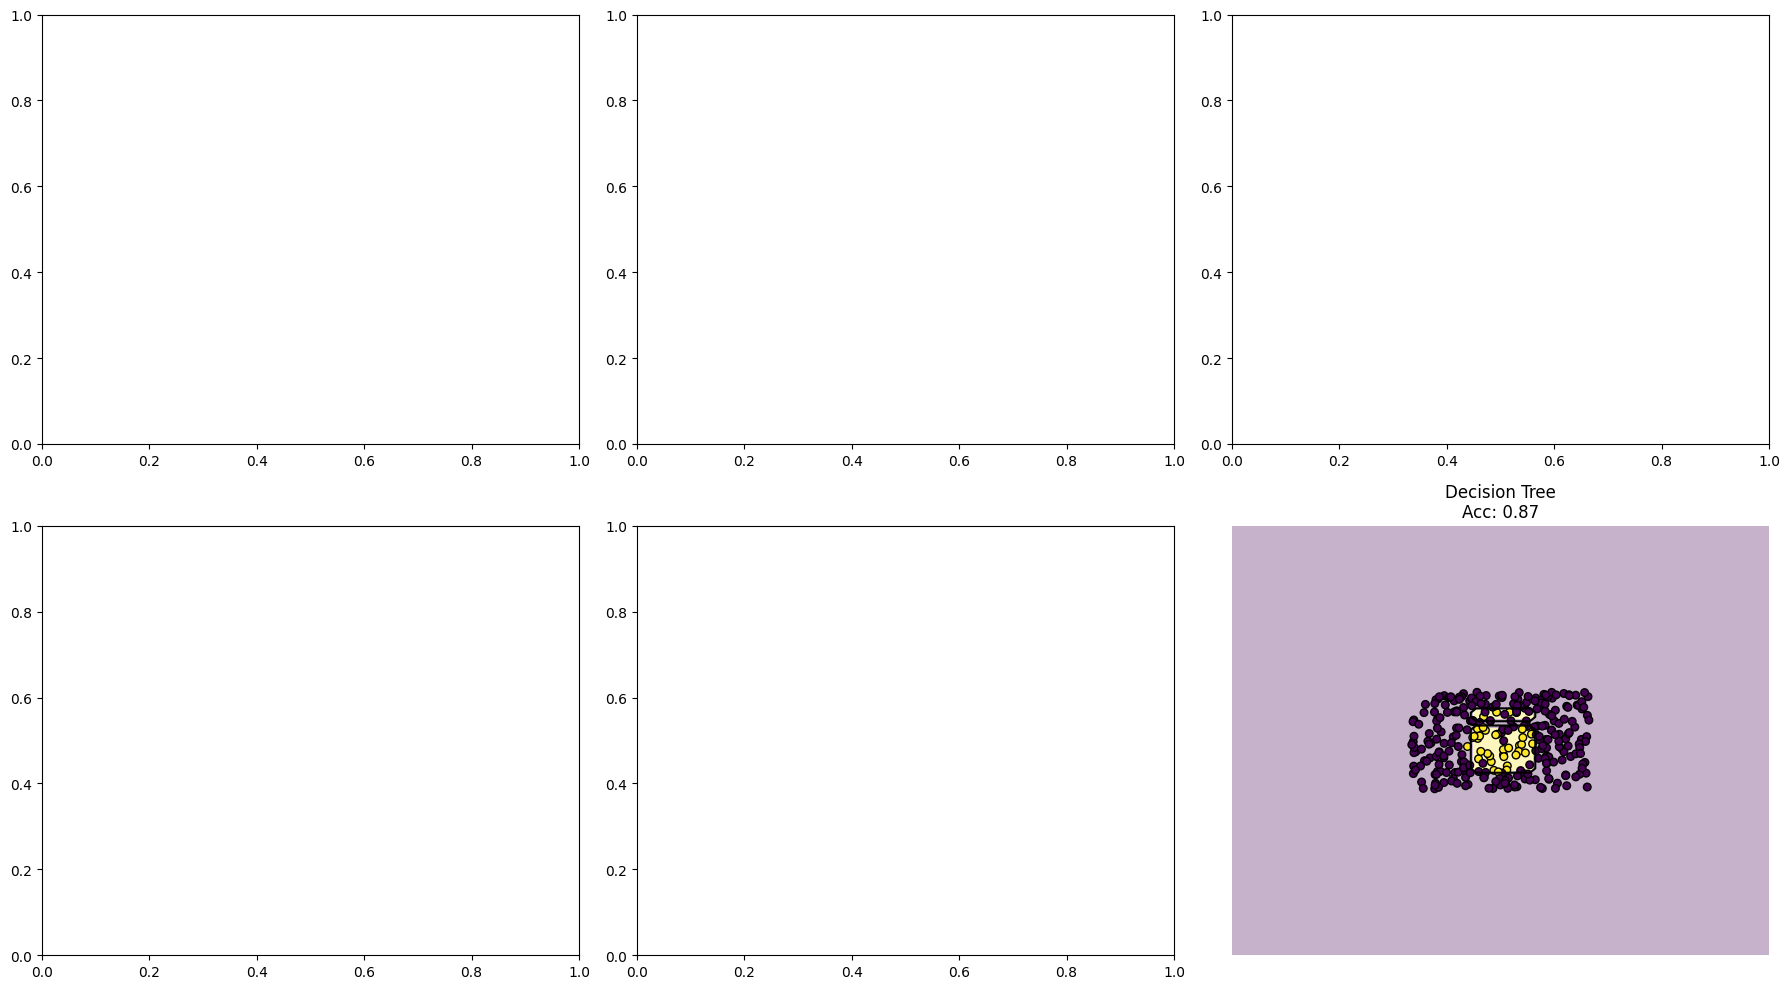

   Flag          Model         Kernel Num_Samples  Accuracy
0    ak            SVM         linear         300  1.000000
1    ak            SVM           poly         300  1.000000
2    ak            SVM            rbf         300  1.000000
3    ak            SVM        sigmoid         300  1.000000
4    ak  Decision Tree  decision_tree         300  0.966667
5    tn            SVM         linear         300  0.900000
6    tn            SVM           poly         300  0.900000
7    tn            SVM            rbf         300  0.900000
8    tn            SVM        sigmoid         300  0.900000
9    tn  Decision Tree  decision_tree         300  0.933333
10   tx            SVM         linear         300  0.833333
11   tx            SVM           poly         300  0.800000
12   tx            SVM            rbf         300  1.000000
13   tx            SVM        sigmoid         300  0.433333
14   tx  Decision Tree  decision_tree         300  1.000000
15   wa            SVM         linear   

In [30]:
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.inspection import DecisionBoundaryDisplay

# Comparison of SVM and decision tree performance on sampled pixel data for four flags
def model_comparison(X, y, model_type='svm', support_vectors=True, tight_box=False, plot=True, gamma=7, degree=7, max_depth=None):
   
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=7)

    accuracy_scores = {}
    fig, axes = None, None
    if plot:
        fig, axes = plt.subplots(2, 3, figsize=(18, 10))

    if model_type == 'svm':
        kernels = ['linear', 'poly', 'rbf', 'sigmoid']
        for ikernel, kernel in enumerate(kernels):
            # Check if there are at least two classes
            if len(np.unique(y_train)) < 2:
                accuracy_scores[kernel] = np.nan
                continue
            
            # Train the SVC
            clf = svm.SVC(kernel=kernel, degree=degree, gamma=gamma)
            clf.fit(X_train, y_train)
            
            y_pred = clf.predict(X_test)
            accuracy = accuracy_score(y_test, y_pred)
            accuracy_scores[kernel] = accuracy

            if plot:
                ax = axes.flat[ikernel]
                common_params = {"estimator": clf, "X": X, "ax": ax}
                DecisionBoundaryDisplay.from_estimator(
                    **common_params,
                    response_method="predict",
                    plot_method="pcolormesh",
                    alpha=0.3,
                )
                DecisionBoundaryDisplay.from_estimator(
                    **common_params,
                    response_method="decision_function",
                    plot_method="contour",
                    levels=[-1, 0, 1],
                    colors=["k", "k", "k"],
                    linestyles=["--", "-", "--"],
                )

                if support_vectors:
                    ax.scatter(
                        clf.support_vectors_[:, 0],
                        clf.support_vectors_[:, 1],
                        s=150,
                        facecolors="none",
                        edgecolors="k",
                    )

                ax.scatter(X[:, 0], X[:, 1], c=y, s=30, edgecolors="k")
                ax.set_title(f"{kernel}\nAcc: {accuracy:.2f}")
                ax.axis('off')
                if tight_box:
                    ax.set_xlim([X[:, 0].min(), X[:, 0].max()])
                    ax.set_ylim([X[:, 1].min(), X[:, 1].max()])

    elif model_type == 'decision_tree':
        clf = DecisionTreeClassifier(max_depth=max_depth)
        clf.fit(X_train, y_train)
        
        y_pred = clf.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracy_scores['decision_tree'] = accuracy

        if plot:
            ax = axes.flat[-1]
            common_params = {"estimator": clf, "X": X, "ax": ax}
            DecisionBoundaryDisplay.from_estimator(
                **common_params,
                response_method="predict",
                plot_method="pcolormesh",
                alpha=0.3,
            )
            DecisionBoundaryDisplay.from_estimator(
                **common_params,
                response_method="predict",
                plot_method="contour",
                levels=[-1, 0, 1],
                colors=["k", "k", "k"],
                linestyles=["--", "-", "--"],
            )

            ax.scatter(X[:, 0], X[:, 1], c=y, s=30, edgecolors="k")
            ax.set_title(f"Decision Tree\nAcc: {accuracy:.2f}")
            ax.axis('off')
            if tight_box:
                ax.set_xlim([X[:, 0].min(), X[:, 0].max()])
                ax.set_ylim([X[:, 1].min(), X[:, 1].max()])

    if plot:
        plt.tight_layout()
        plt.show()

    return accuracy_scores


indices = [0, 41, 42, 46]  
selected_images = [images[i] for i in indices]
selected_labels = [labels[i] for i in indices]

# DataFrame to store results
results_df = pd.DataFrame(columns=['Flag', 'Model', 'Kernel', 'Num_Samples', 'Accuracy'])

# Display the flags and perform model comparison with increased gamma and degree
for img, label in zip(selected_images, selected_labels):
    for num_samples in [300]:
        X, y = sample_pixels(img, num_samples=num_samples)
        if len(np.unique(y)) < 2:
            continue 

        # SVM comparison
        accuracy_scores_svm = model_comparison(X, y, model_type='svm', plot=True, gamma=7, degree=7)
        for kernel, accuracy in accuracy_scores_svm.items():
            results_df = pd.concat([results_df, pd.DataFrame({'Flag': [label], 'Model': ['SVM'], 'Kernel': [kernel], 'Num_Samples': [num_samples], 'Accuracy': [accuracy]})], ignore_index=True)

        # Decision Tree comparison
        accuracy_scores_tree = model_comparison(X, y, model_type='decision_tree', plot=True, max_depth=5)
        for model, accuracy in accuracy_scores_tree.items():
            results_df = pd.concat([results_df, pd.DataFrame({'Flag': [label], 'Model': ['Decision Tree'], 'Kernel': [model], 'Num_Samples': [num_samples], 'Accuracy': [accuracy]})], ignore_index=True)

# Display the results
print(results_df)


The decision tree preformed comparaly to the SVM for the selected flags. The decision tree outperformed all SVM kernels for Tennesee and tied for Texas.